In [1]:
import time

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd
from seirsplus.models import *
from seirsplus.networks import *
import networkx

/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.51.2-dppy0.10.0-3.gbfbd2eeae.dirty (/glob/development-tools/versions/oneapi/beta10/inteloneapi/intelpython/python3.7/lib/python3.7/site-packages), Requirement.parse('numba<0.52,>=0.51.2')))'.
  numba.core.entrypoints.init_all()


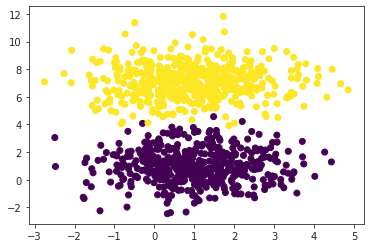

In [108]:
s = 1000
arr = [int(s/2), int(s/2)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=[[1,1],[1,7]] ,cluster_std=1.2)
plt.scatter(data[:,0],data[:,1], c=y, cmap = 'viridis')

In [109]:
r = np.random.RandomState(10)
coo_matrix1 = umap.fuzzy_simplicial_set(data,15,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz()

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)


/home/u47914/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:638: RuntimeWarning: divide by zero encountered in true_divide
  delta * (k * k / distance ** 2 - Ai * distance / k)


(-3.1351968660783784,
 5.239275012315522,
 -3.1846497062469616,
 12.544770160230383)

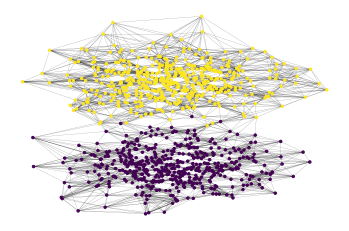

In [110]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =11)
pos13 = nx.draw_networkx(G1,pos= data,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")


In [111]:
SIGMA  = 1/5.2
GAMMA  = 1/10
MU_I   = 0.002

R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

P      = 0.2
Q      = 0.05

In [112]:
model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 100, initI = 50)

In [113]:
model_base.run(T=300)

t = 0.08
t = 10.02
t = 20.05
t = 30.00
t = 40.09
t = 60.27
t = 70.84
t = 80.02
t = 100.93


True

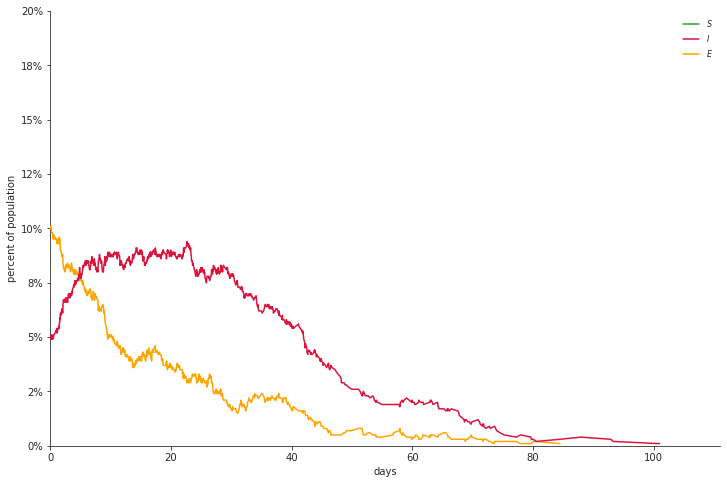

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f043cde7590>)

In [114]:
model_base.figure_basic(ylim=0.2)

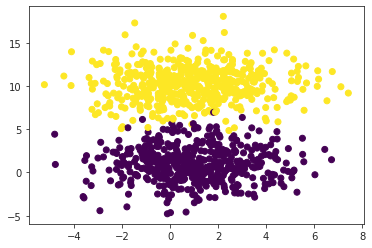

In [136]:
s = 1000
arr = [int(s/2), int(s/2)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=[[1,1],[1,10]] ,cluster_std= 2)
plt.scatter(data[:,0],data[:,1], c=y, cmap= 'viridis')

In [137]:
r = np.random.RandomState(10)
coo_matrix1 = umap.fuzzy_simplicial_set(data,15,r,'euclidean')
coo_matrix1 = np.asarray(coo_matrix1)
sparse_matrix = coo_matrix1[0]
#print(sparse_matrix.getnnz()

G1 = nx.from_scipy_sparse_matrix(sparse_matrix)


/home/u47914/.local/lib/python3.7/site-packages/networkx/drawing/layout.py:638: RuntimeWarning: divide by zero encountered in true_divide
  delta * (k * k / distance ** 2 - Ai * distance / k)


(-5.8893121416747745,
 8.062775718736681,
 -5.920285629621406,
 19.187153052927112)

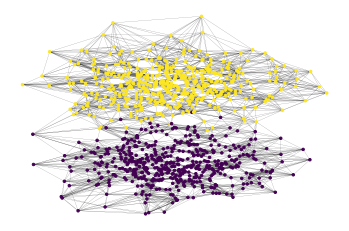

In [138]:
fig, ax = plt.subplots()
my_pos = nx.spring_layout(G1,seed =10)
pos13 = nx.draw_networkx(G1,pos= data,width=0.1,with_labels=False, node_size=6, node_color=y,cmap = 'viridis',edge_color='black',)
ax.axis("off")


In [139]:
SIGMA  = 1/5.2
GAMMA  = 1/10
MU_I   = 0.002

R0     = 2.5
BETA   = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

P      = 0.2
Q      = 0.05

In [140]:
model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = 100, initI = 50)

In [141]:
model_base.run(T=300)

t = 0.06
t = 10.00
t = 20.04
t = 30.05
t = 40.01
t = 50.21
t = 60.16
t = 70.03
t = 80.47
t = 90.07
t = 120.17


True

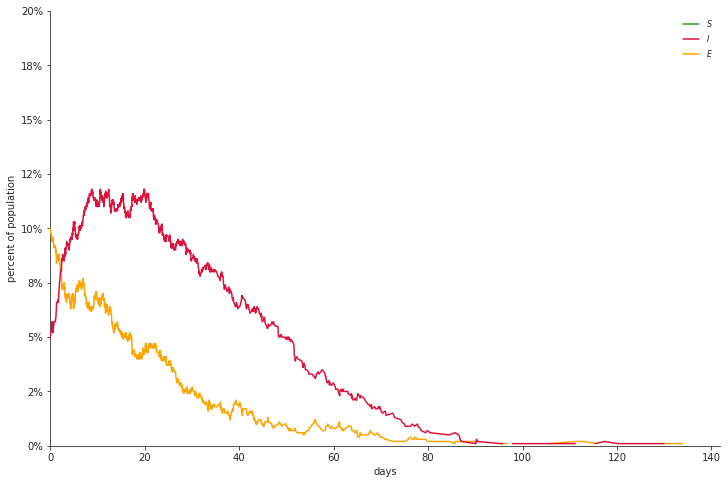

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f04742ec7d0>)

In [142]:
model_base.figure_basic(ylim=0.2)

In [10]:
from PIL import Image
import cv2
import io
import PIL
def get_img_from_fig(fig, dpi=100):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

In [7]:
def ipfn(s,c_arr, sd, n_neighbors ):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
    print([s,c_arr, sd, n_neighbors])
    i=n_neighbors
    arr = [int(s/2), int(s/2)]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sd)
    plt.scatter(data[:,0],data[:,1], c=y, cmap = 'viridis')
    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
    
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.4, initI = s*0.1)
    
    model_base.run(T=300)
    img = get_img_from_fig(model_base.figure_basic(ylim=0.5)[0])
    im = Image.fromarray(img)
    im.save(f'nn={i}|{c_arr[1]}|{sd}.png')

[1000, [[1, 1], [1, 5]], 1.5, 30]
t = 0.01
t = 10.01
t = 20.01
t = 30.02
t = 40.14
t = 50.15
t = 60.56
t = 90.25


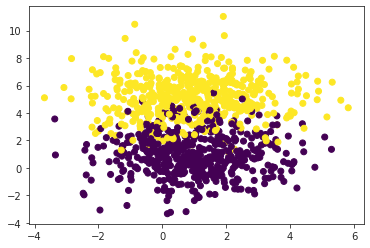

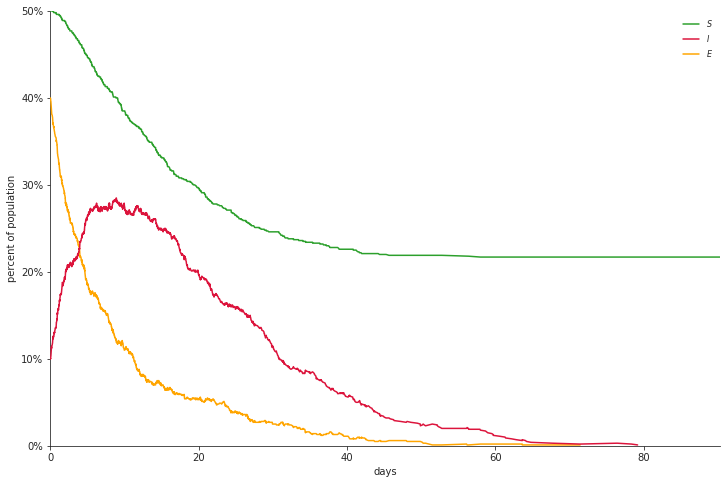

[1000, [[1, 1], [1, 5]], 2.0, 30]
t = 0.01
t = 10.01
t = 20.01
t = 30.14
t = 40.18
t = 50.58
t = 60.09
t = 70.79


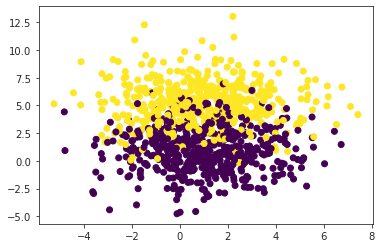

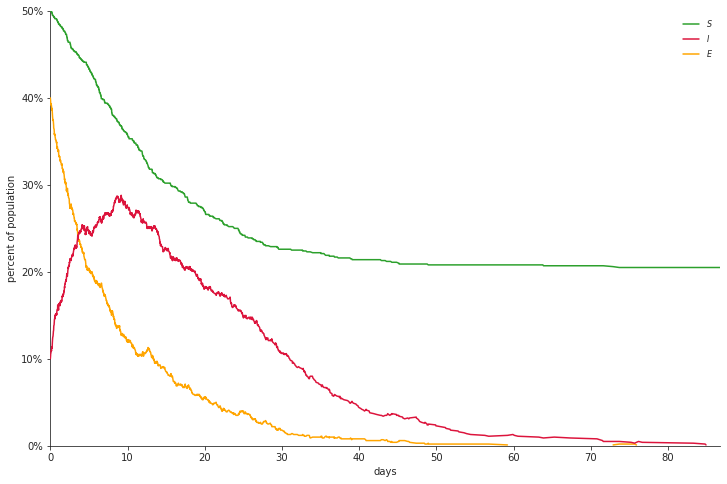

[1000, [[1, 1], [1, 5]], 2.5, 30]
t = 0.00
t = 10.00
t = 20.09
t = 30.13
t = 40.14
t = 50.25
t = 60.77
t = 70.48


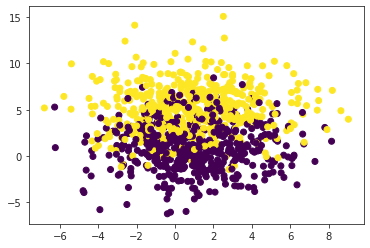

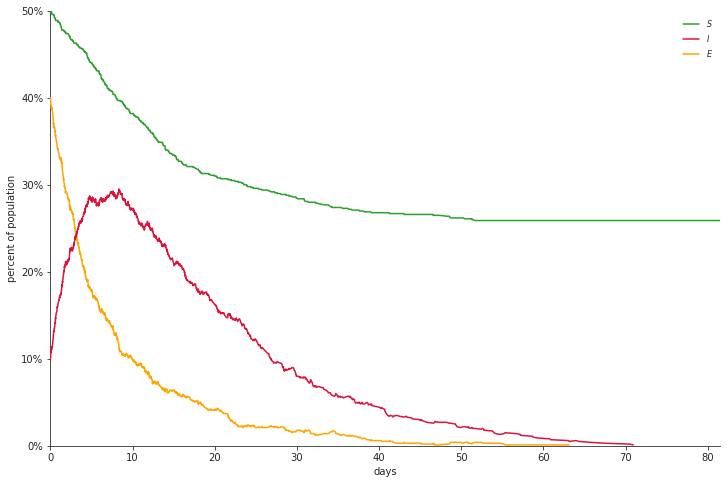

[1000, [[1, 1], [1, 5]], 3.0, 30]
t = 0.03
t = 10.03
t = 20.01
t = 30.08
t = 40.04
t = 50.53
t = 60.19
t = 70.14


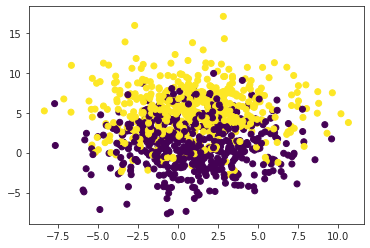

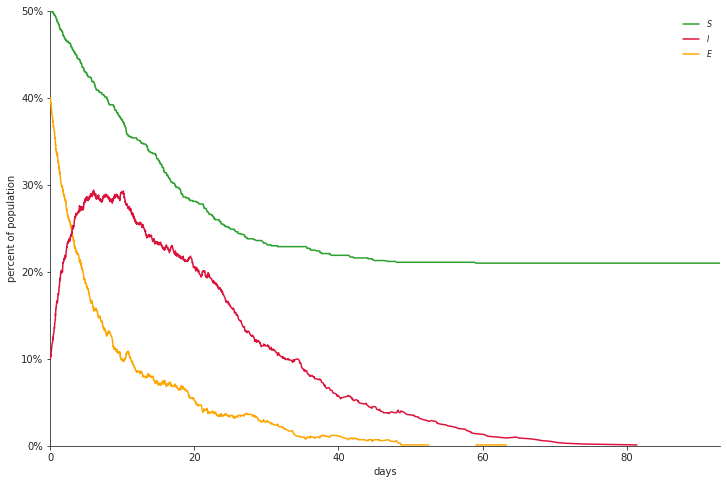

[1000, [[1, 1], [1, 5]], 3.5, 30]
t = 0.00
t = 10.01
t = 20.01
t = 30.05
t = 40.00
t = 50.33
t = 60.55
t = 70.36


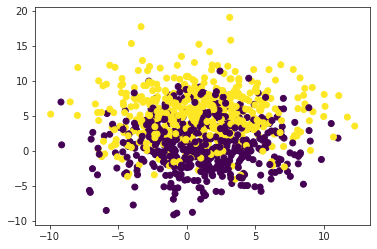

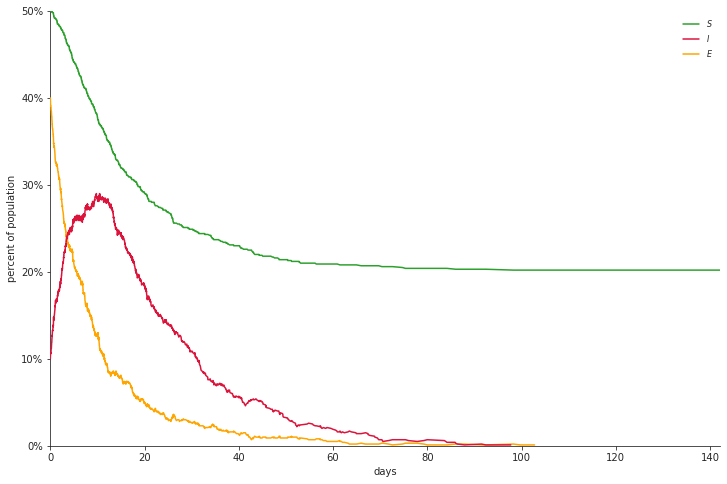

[1000, [[1, 1], [1, 5]], 4.0, 30]
t = 0.00
t = 10.01
t = 20.01
t = 30.07
t = 40.06
t = 50.33
t = 120.71


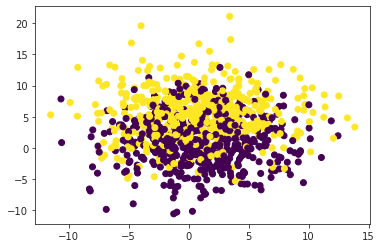

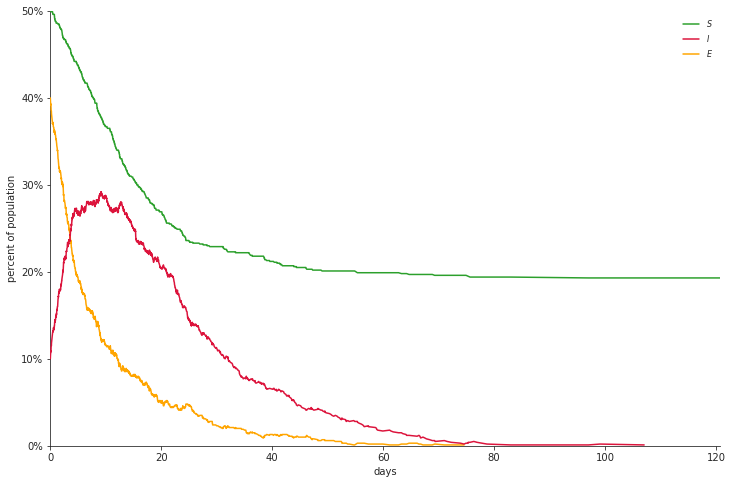

[1000, [[1, 1], [1, 9]], 1.5, 30]
t = 0.00
t = 10.01
t = 20.05
t = 30.02
t = 40.85
t = 50.29
t = 60.07
t = 70.20
t = 80.91
t = 90.51


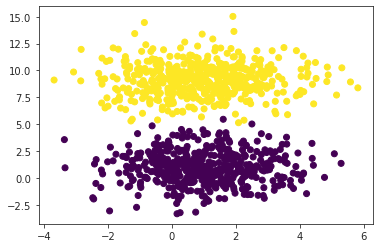

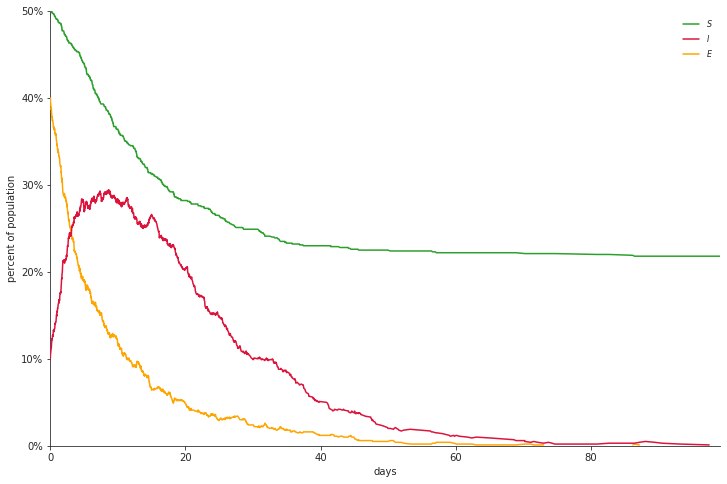

[1000, [[1, 1], [1, 9]], 2.0, 30]


KeyboardInterrupt: 

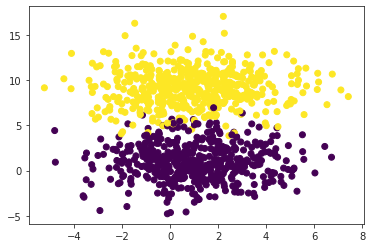

In [11]:
for l in range(5):
    for sdv in range(3, 9):
        ipfn(1000,[[1,1],[1,(4*l+5)]], sdv/2, 30)

[1000, [[1, 1], [1, 5]], 1.5, 5]
t = 0.00
t = 10.05
t = 20.06
t = 30.05
t = 40.01
t = 50.00
t = 60.02
t = 70.10
t = 80.69
t = 90.17
t = 100.13


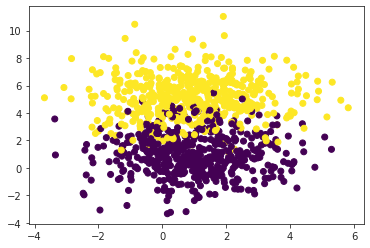

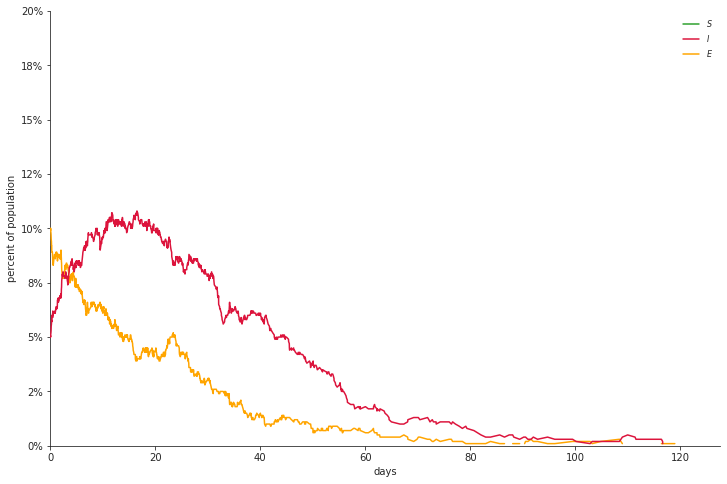

[1000, [[1, 1], [1, 5]], 2.0, 5]
t = 0.00
t = 10.02
t = 20.03
t = 30.10
t = 40.10
t = 50.05
t = 60.01
t = 70.32
t = 80.74
t = 90.52


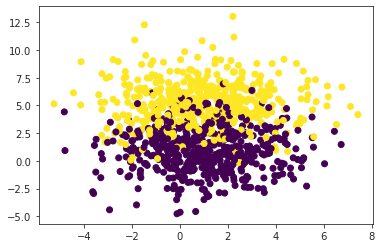

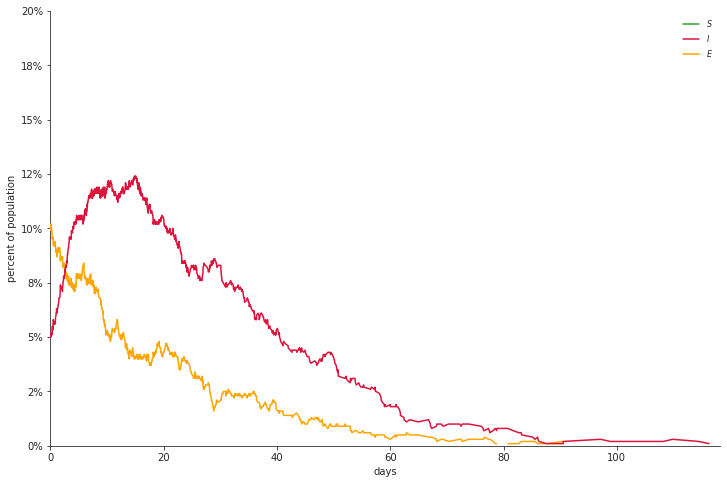

[1000, [[1, 1], [1, 5]], 2.5, 5]
t = 0.03
t = 10.03
t = 20.04
t = 30.09
t = 40.01
t = 50.03
t = 60.12
t = 70.43
t = 80.19
t = 91.00
t = 110.34


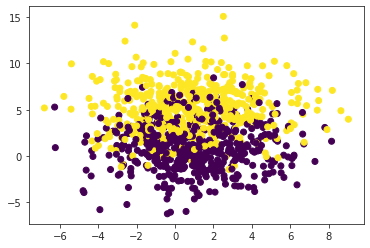

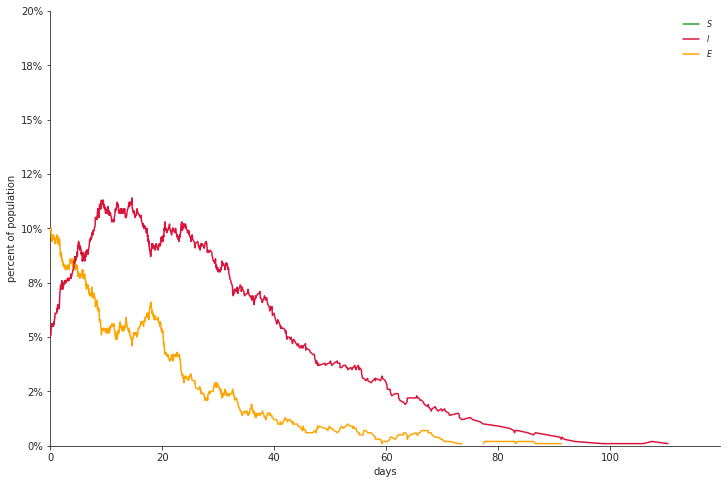

[1000, [[1, 1], [1, 5]], 3.0, 5]
t = 0.02
t = 10.06
t = 20.08
t = 30.09
t = 40.07
t = 50.07
t = 60.49
t = 80.06
t = 90.38


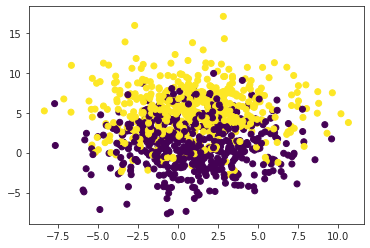

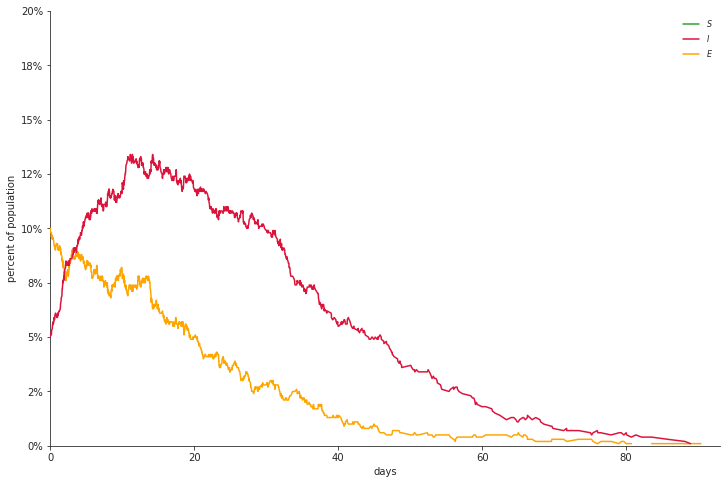

[1000, [[1, 1], [1, 5]], 3.5, 5]
t = 0.02
t = 10.00
t = 20.10
t = 30.20
t = 40.16
t = 50.14
t = 60.13
t = 70.26
t = 80.30


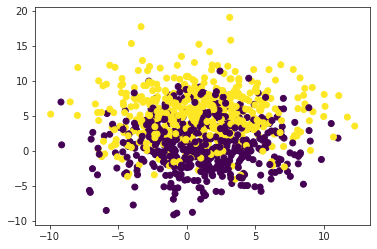

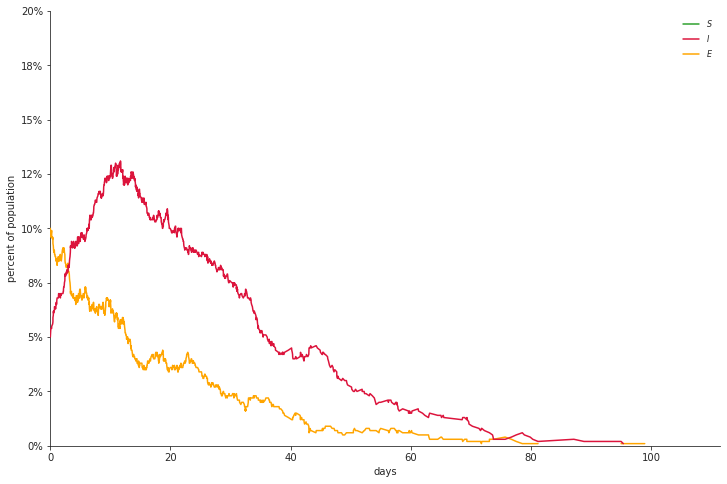

[1000, [[1, 1], [1, 5]], 4.0, 5]
t = 0.03
t = 10.02
t = 20.05
t = 30.03
t = 40.11
t = 50.08
t = 60.20


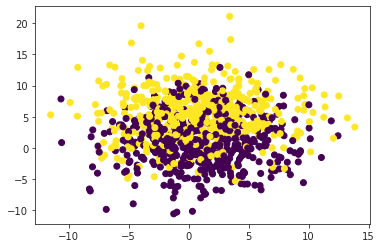

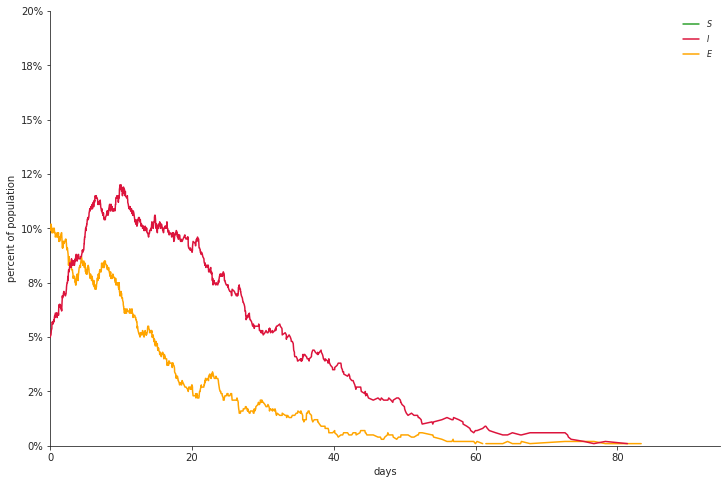

[1000, [[1, 1], [1, 5]], 1.5, 10]
t = 0.00
t = 10.01
t = 20.01
t = 30.02
t = 40.12
t = 50.02
t = 60.27
t = 70.11
t = 90.67
t = 120.02


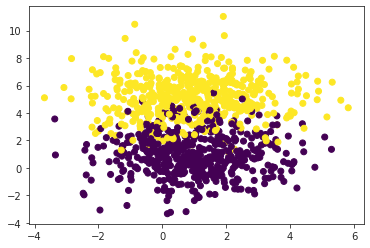

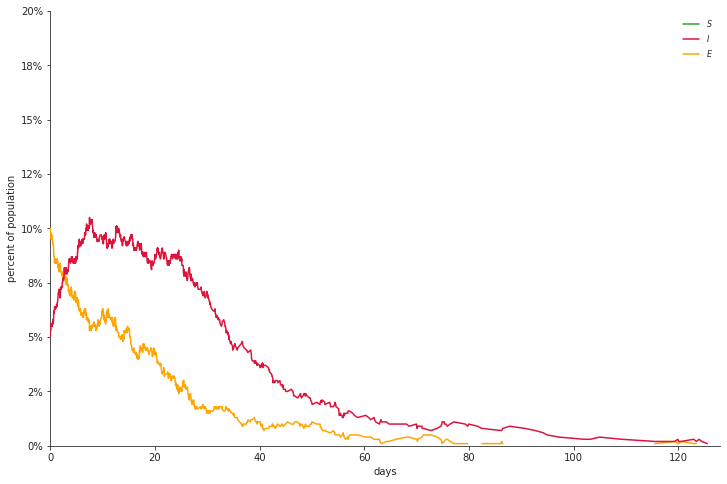

[1000, [[1, 1], [1, 5]], 2.0, 10]
t = 0.02
t = 10.04
t = 20.07
t = 30.01
t = 40.17
t = 50.11
t = 60.01
t = 70.89
t = 80.23
t = 110.08


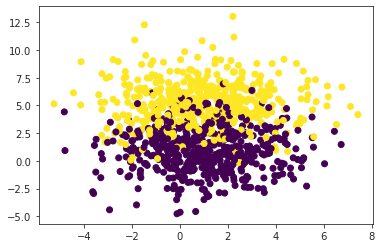

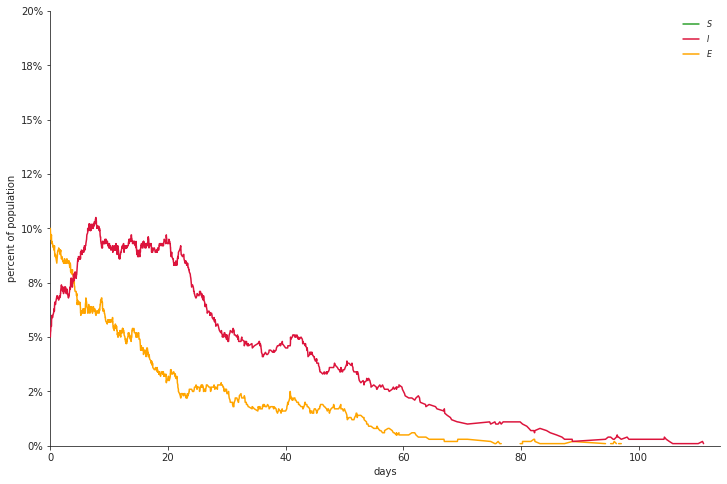

[1000, [[1, 1], [1, 5]], 2.5, 10]
t = 0.03
t = 10.10
t = 20.04
t = 30.12
t = 40.06
t = 50.19
t = 60.61
t = 70.10
t = 80.42
t = 90.76
t = 100.19


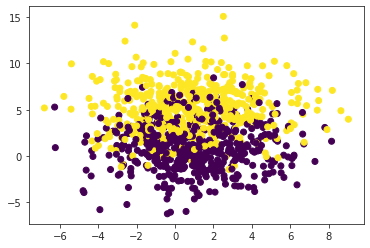

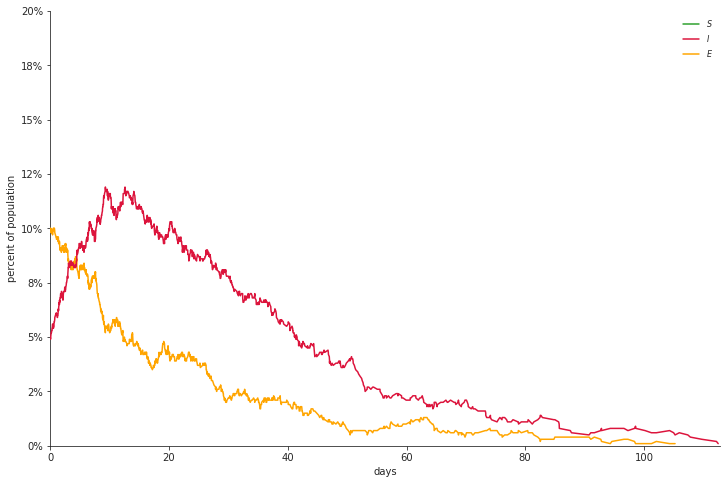

[1000, [[1, 1], [1, 5]], 3.0, 10]
t = 0.01
t = 10.04
t = 20.00
t = 30.05
t = 40.09
t = 50.03
t = 60.55
t = 70.14
t = 90.29


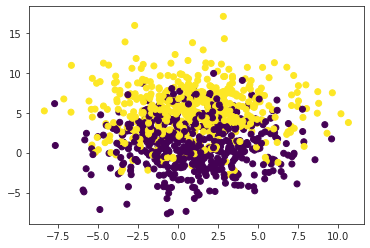

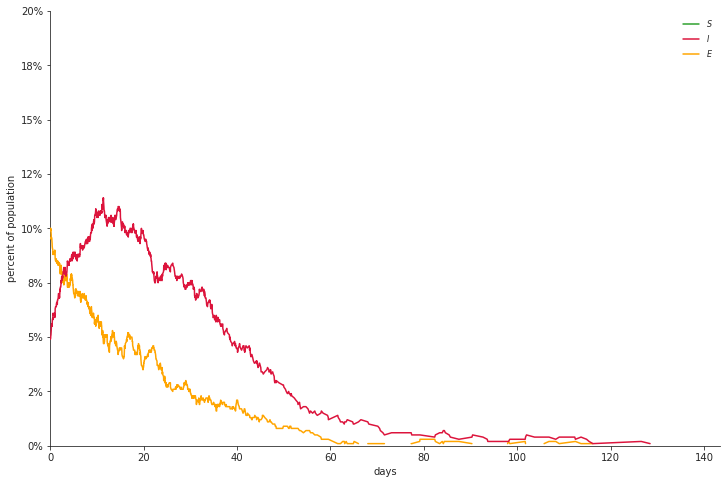

[1000, [[1, 1], [1, 5]], 3.5, 10]
t = 0.02
t = 10.07
t = 20.11
t = 30.18
t = 40.21
t = 50.00
t = 60.27
t = 70.16
t = 90.14


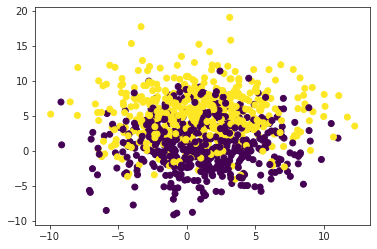

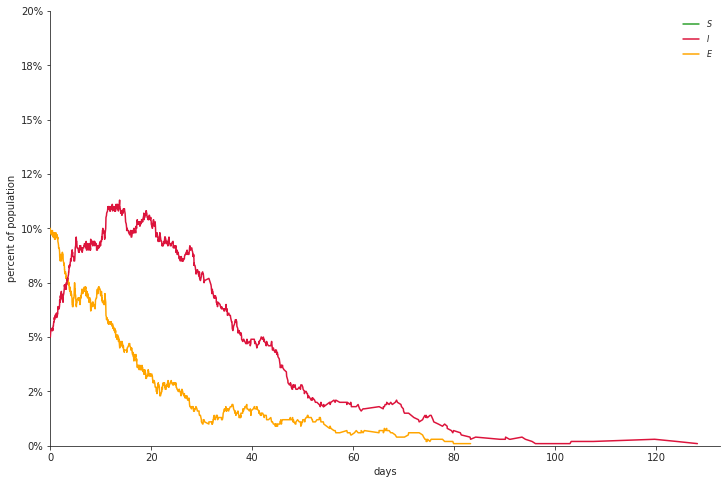

[1000, [[1, 1], [1, 5]], 4.0, 10]
t = 0.00
t = 10.02
t = 20.05
t = 30.04
t = 40.00
t = 50.10
t = 60.11
t = 70.47
t = 80.36
t = 90.24
t = 100.81
t = 130.21


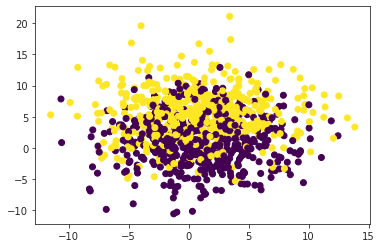

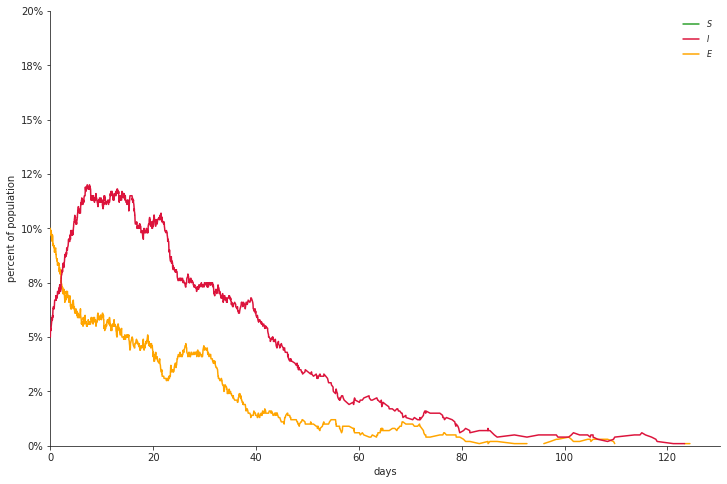

[1000, [[1, 1], [1, 5]], 1.5, 15]
t = 0.02
t = 10.00
t = 20.07
t = 30.12
t = 40.14
t = 50.69
t = 60.11
t = 70.17
t = 80.83
t = 90.27
t = 110.23


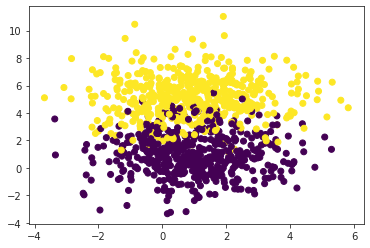

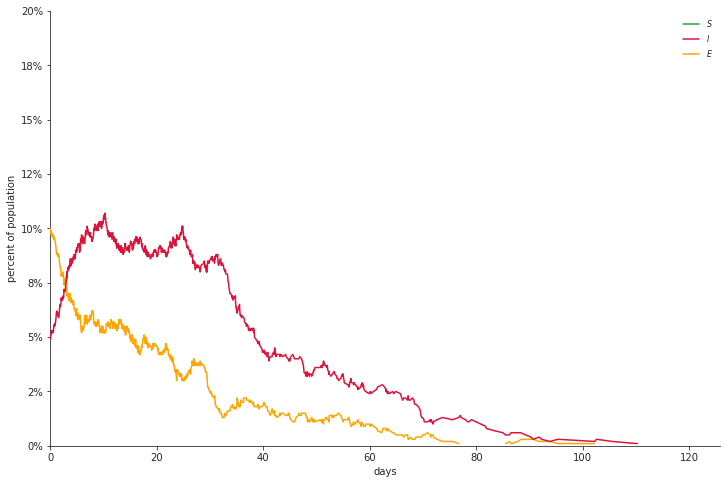

[1000, [[1, 1], [1, 5]], 2.0, 15]
t = 0.03
t = 10.02
t = 20.11
t = 30.07
t = 40.04
t = 50.10
t = 60.09
t = 70.64
t = 80.23
t = 110.02
t = 120.69
t = 140.12
t = 150.49


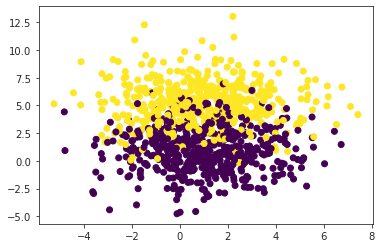

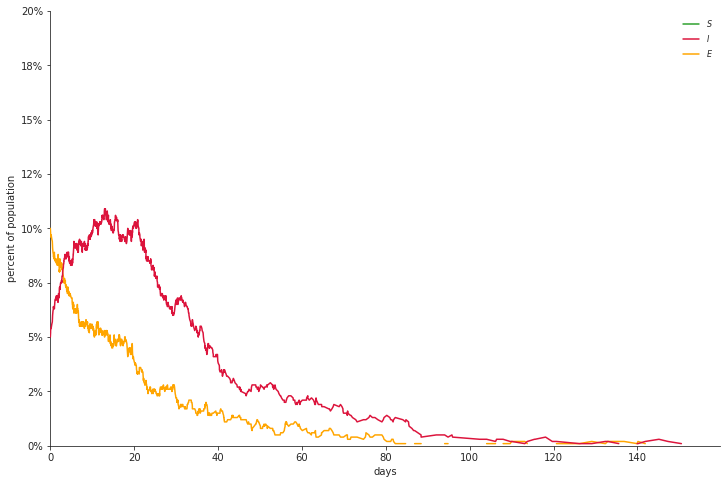

[1000, [[1, 1], [1, 5]], 2.5, 15]
t = 0.00
t = 10.05
t = 20.02
t = 30.16
t = 40.05
t = 50.01
t = 60.15
t = 70.10
t = 80.78
t = 90.04


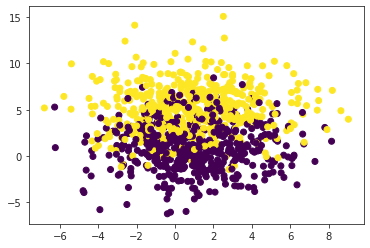

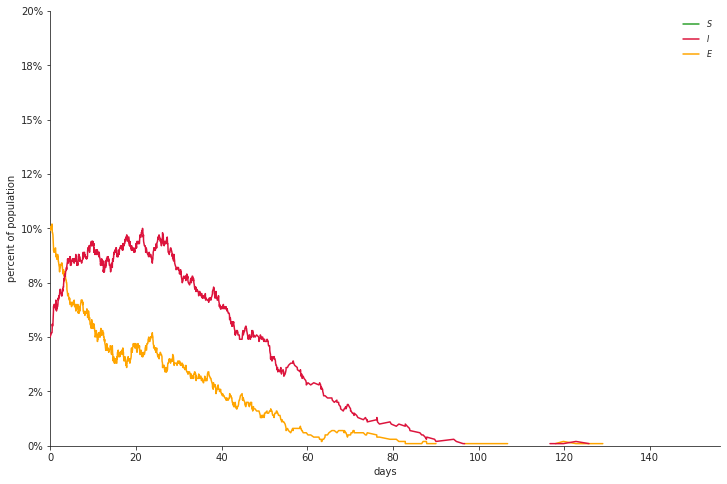

[1000, [[1, 1], [1, 5]], 3.0, 15]
t = 0.03
t = 10.02
t = 20.01
t = 30.01
t = 40.00
t = 50.02
t = 60.09
t = 70.17
t = 80.12
t = 90.07
t = 110.69
t = 120.89
t = 130.21


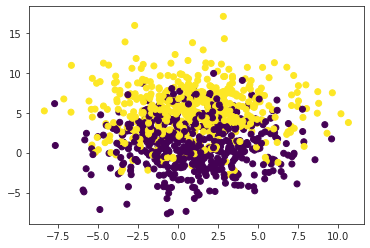

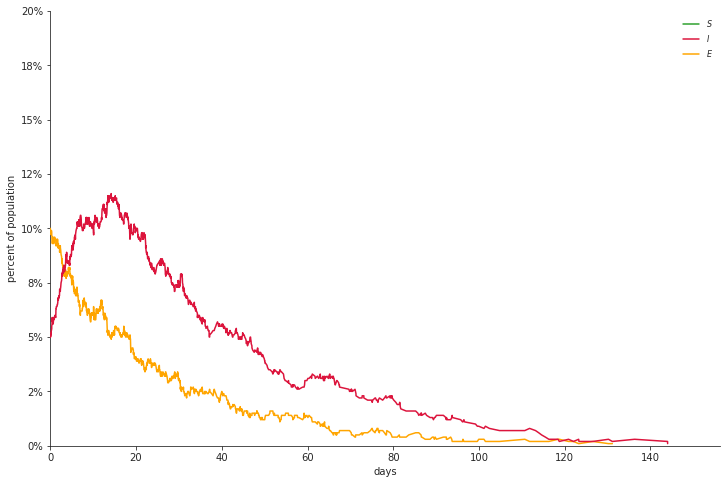

[1000, [[1, 1], [1, 5]], 3.5, 15]
t = 0.07
t = 10.01
t = 20.22
t = 30.05
t = 40.15
t = 50.09
t = 60.40


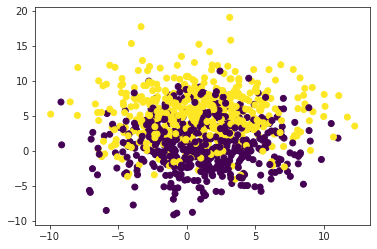

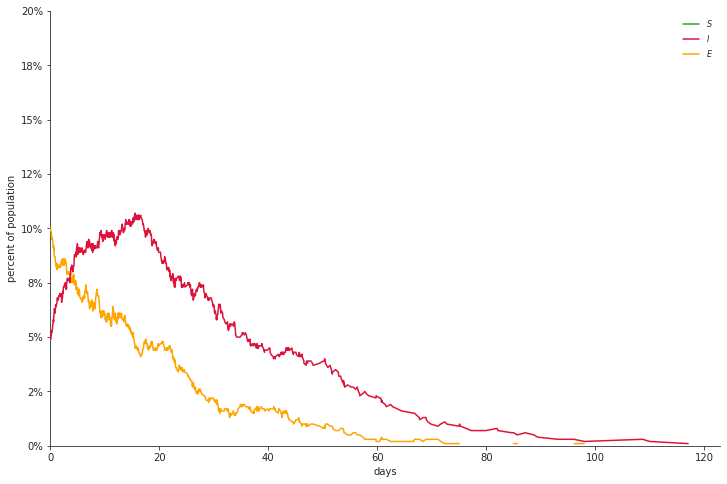

[1000, [[1, 1], [1, 5]], 4.0, 15]
t = 0.10
t = 10.02
t = 20.03
t = 30.05
t = 40.19
t = 50.19
t = 60.11
t = 70.07
t = 80.10
t = 90.55
t = 100.11
t = 110.39
t = 130.31
t = 160.02


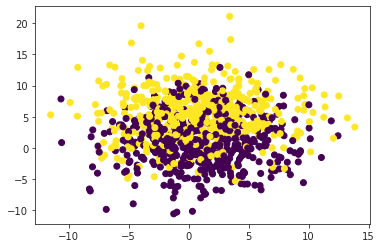

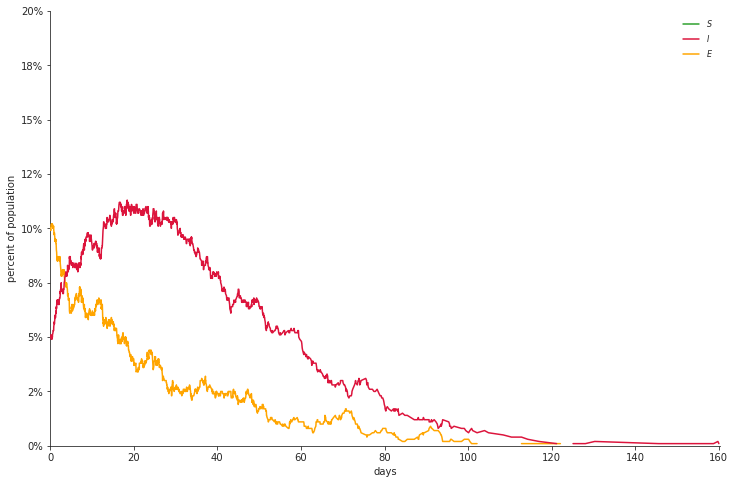

[1000, [[1, 1], [1, 5]], 1.5, 20]
t = 0.01
t = 10.09
t = 20.00
t = 30.13
t = 40.18
t = 50.12
t = 60.06
t = 70.10
t = 90.23
t = 100.19
t = 110.06


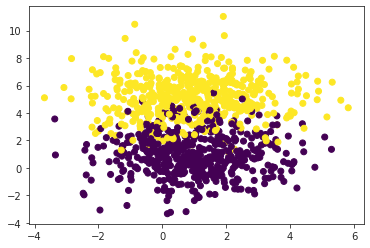

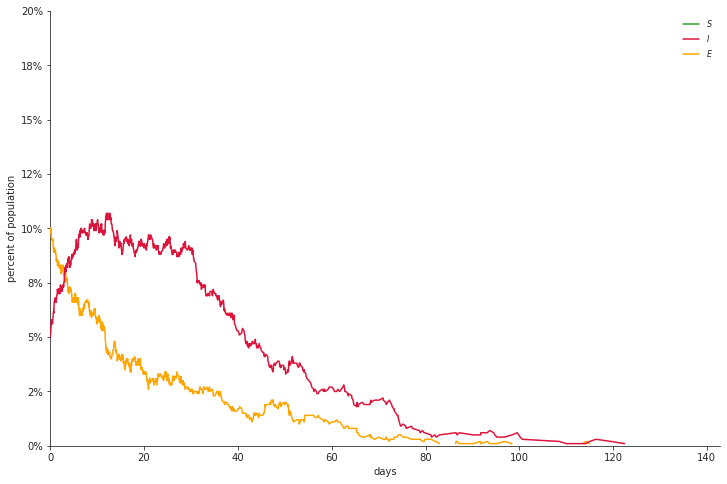

[1000, [[1, 1], [1, 5]], 2.0, 20]
t = 0.03
t = 10.03
t = 20.01
t = 30.04
t = 40.01
t = 50.01
t = 60.23
t = 70.16
t = 80.29
t = 90.21
t = 100.28
t = 130.34


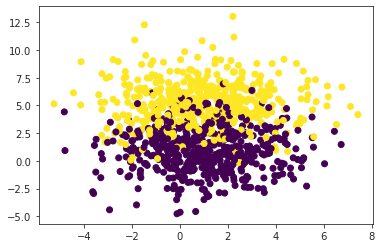

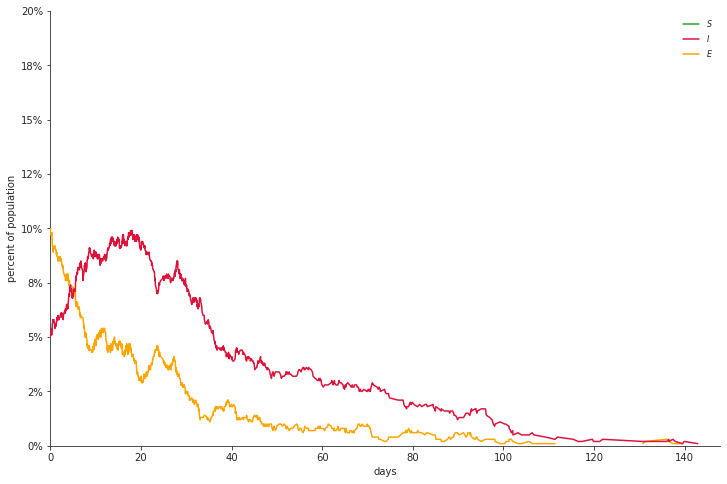

[1000, [[1, 1], [1, 5]], 2.5, 20]
t = 0.05
t = 10.01
t = 20.04
t = 30.03
t = 40.01
t = 50.13
t = 60.00
t = 70.01
t = 80.00
t = 100.56
t = 110.13


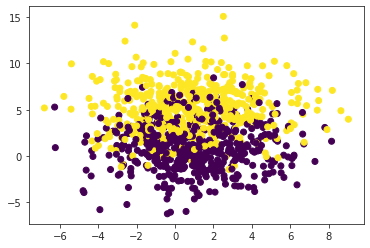

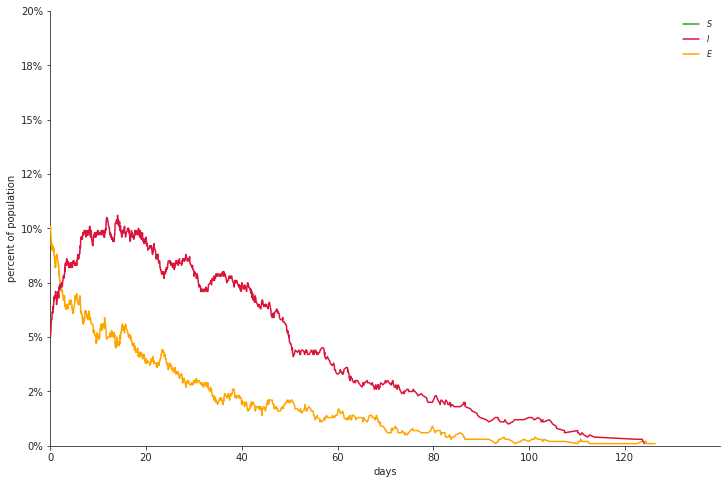

[1000, [[1, 1], [1, 5]], 3.0, 20]
t = 0.01
t = 10.06
t = 20.03
t = 30.27
t = 40.07
t = 50.03
t = 60.08
t = 80.09
t = 90.91


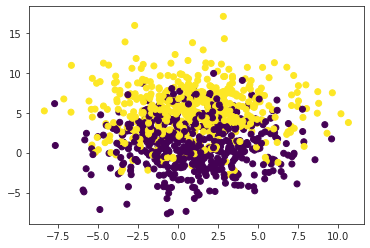

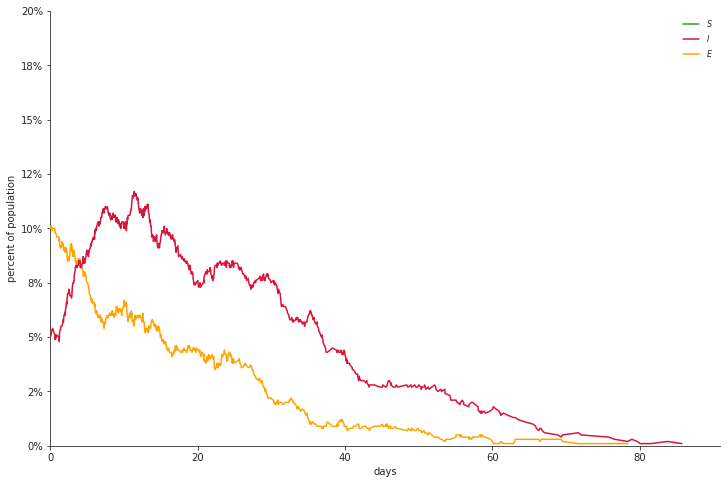

[1000, [[1, 1], [1, 5]], 3.5, 20]
t = 0.13
t = 10.06
t = 20.10
t = 30.02
t = 40.15
t = 50.48
t = 60.35
t = 70.01
t = 90.90
t = 120.06


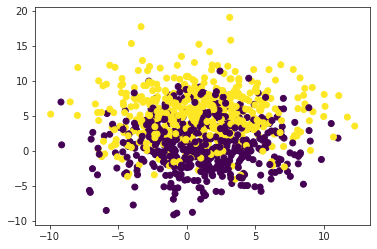

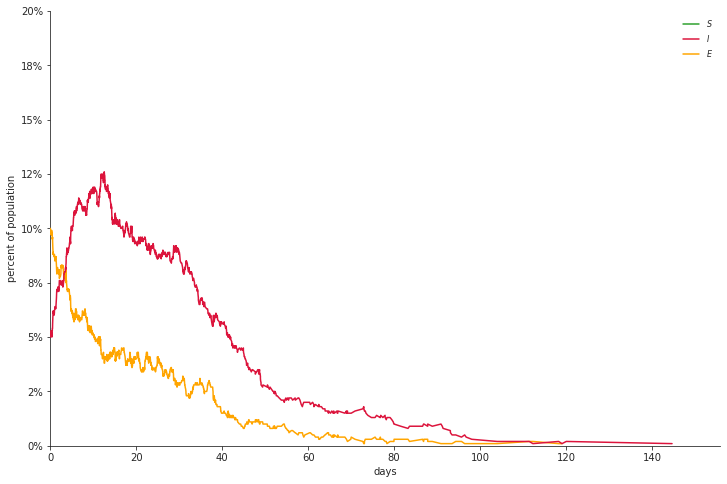

[1000, [[1, 1], [1, 5]], 4.0, 20]
t = 0.00
t = 10.01
t = 20.04
t = 30.02
t = 40.05
t = 50.08
t = 60.37
t = 70.33


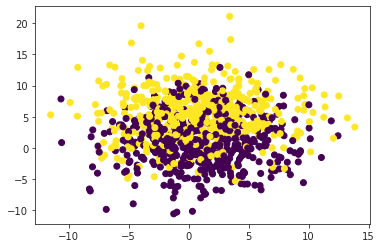

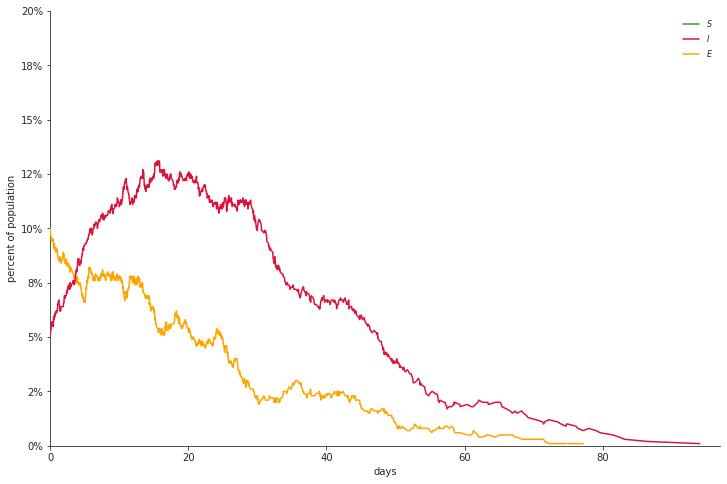

[1000, [[1, 1], [1, 5]], 1.5, 25]
t = 0.08
t = 10.01
t = 20.06
t = 30.03
t = 40.03
t = 50.37
t = 60.20
t = 80.21
t = 90.98
t = 120.07
t = 140.72
t = 160.02


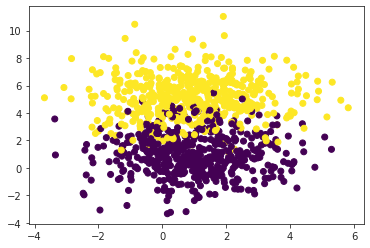

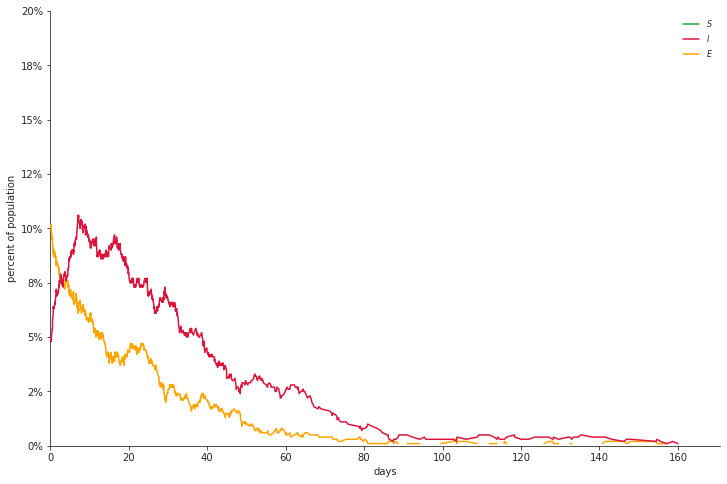

[1000, [[1, 1], [1, 5]], 2.0, 25]
t = 0.01
t = 10.01
t = 20.12
t = 30.11
t = 40.00
t = 50.40
t = 70.61
t = 80.01
t = 120.28


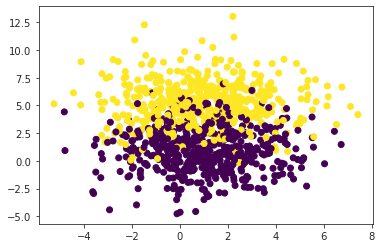

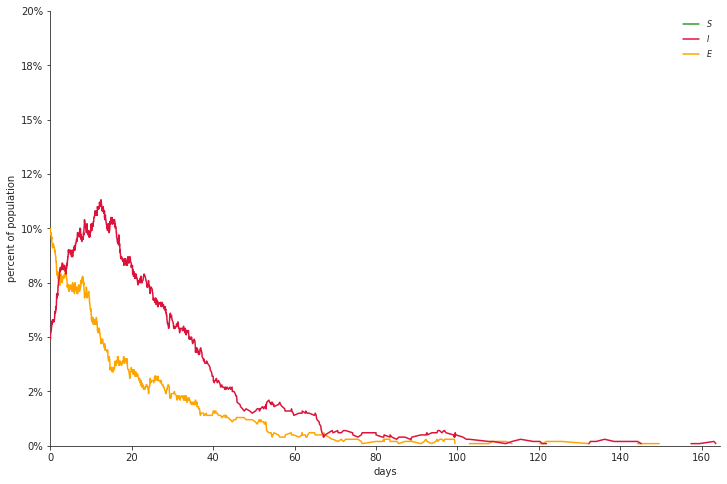

[1000, [[1, 1], [1, 5]], 2.5, 25]
t = 0.16
t = 10.01
t = 20.01
t = 30.05
t = 40.01
t = 50.14
t = 60.79
t = 70.76
t = 80.25
t = 90.19


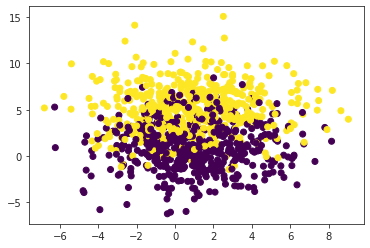

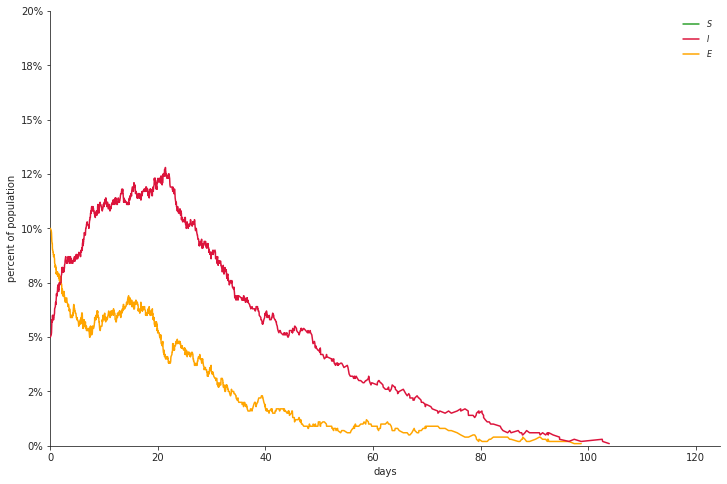

[1000, [[1, 1], [1, 5]], 3.0, 25]
t = 0.00
t = 10.05
t = 20.00
t = 30.01
t = 40.07
t = 50.34
t = 60.19
t = 70.41
t = 90.34
t = 110.68


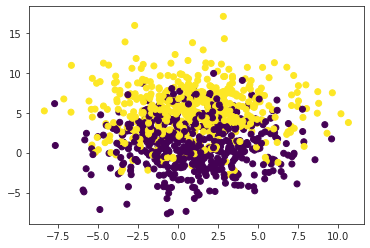

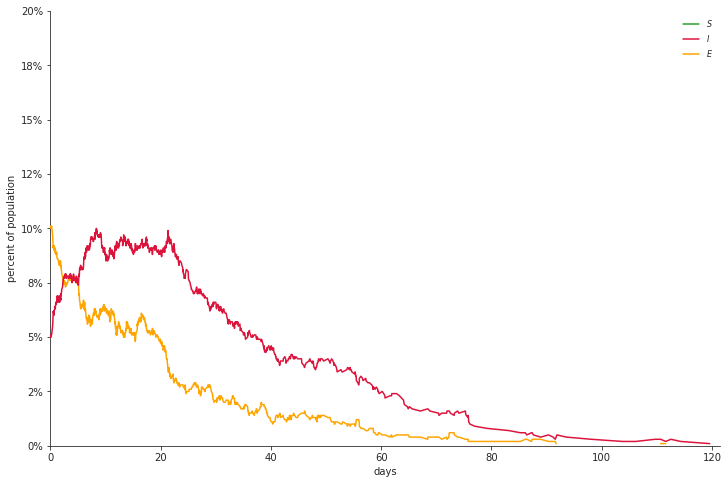

[1000, [[1, 1], [1, 5]], 3.5, 25]
t = 0.08
t = 10.01
t = 20.04
t = 30.01
t = 40.01
t = 50.75
t = 60.43


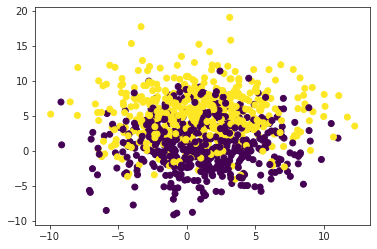

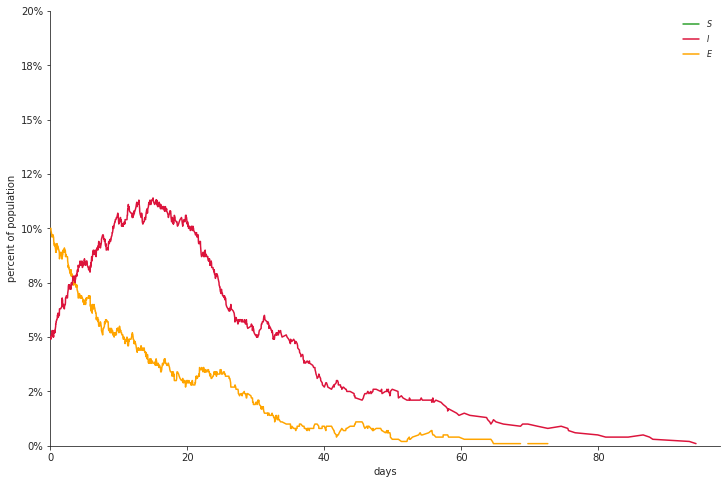

[1000, [[1, 1], [1, 5]], 4.0, 25]
t = 0.07
t = 10.00
t = 20.07
t = 30.06
t = 40.05
t = 50.29
t = 60.41
t = 70.68
t = 80.58
t = 90.85
t = 140.66
t = 150.76


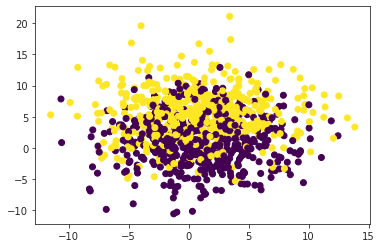

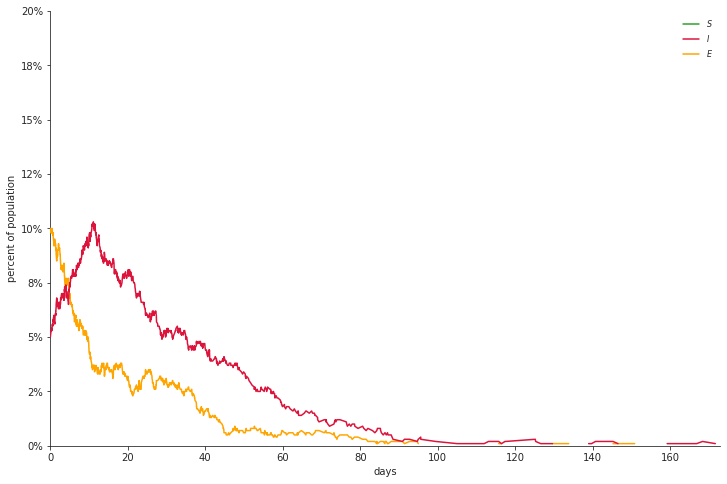

[1000, [[1, 1], [1, 5]], 1.5, 30]
t = 0.02
t = 10.03
t = 20.11
t = 30.09
t = 40.14
t = 50.03
t = 60.34
t = 70.06
t = 80.29
t = 90.24
t = 100.30


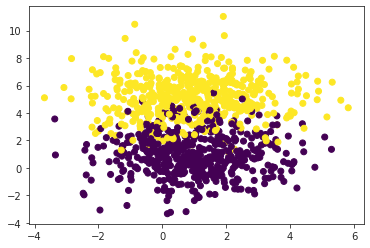

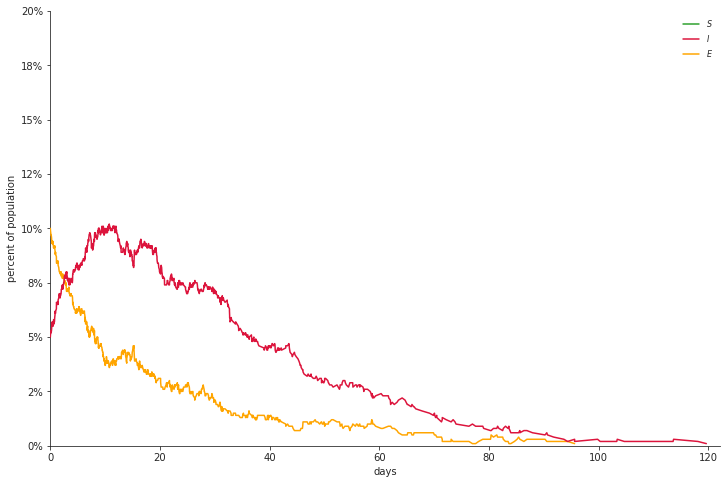

[1000, [[1, 1], [1, 5]], 2.0, 30]
t = 0.05
t = 10.01
t = 20.03
t = 30.00
t = 40.01
t = 50.20
t = 60.23
t = 70.01
t = 80.79
t = 90.83


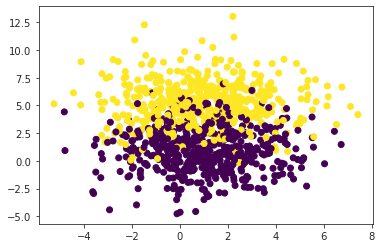

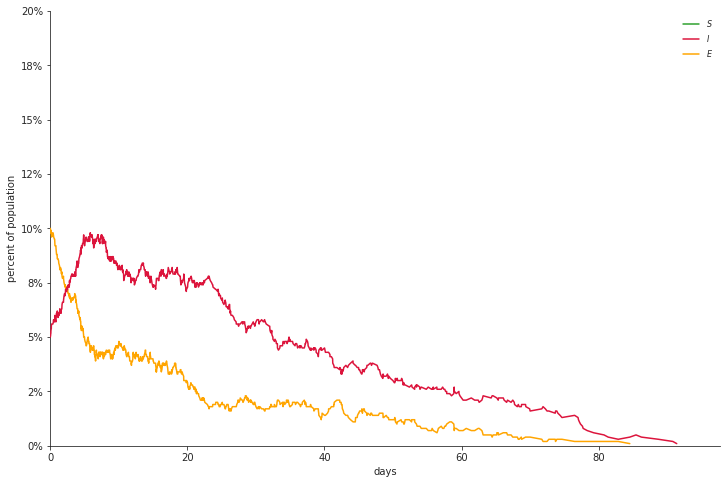

[1000, [[1, 1], [1, 5]], 2.5, 30]
t = 0.06
t = 10.04
t = 20.15
t = 30.10
t = 40.16
t = 50.26
t = 60.10
t = 70.24
t = 80.34
t = 110.30


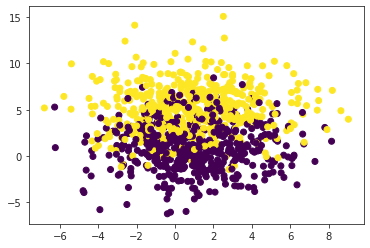

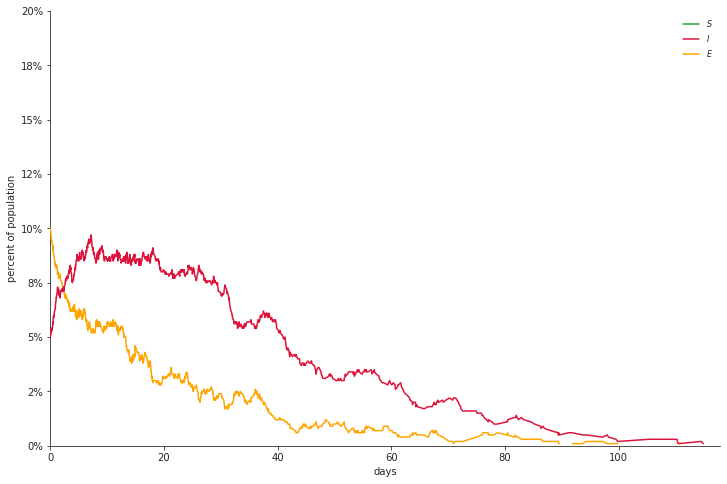

[1000, [[1, 1], [1, 5]], 3.0, 30]
t = 0.01
t = 10.01
t = 20.02
t = 30.01
t = 40.03
t = 50.00
t = 60.07
t = 70.29
t = 80.16
t = 90.42


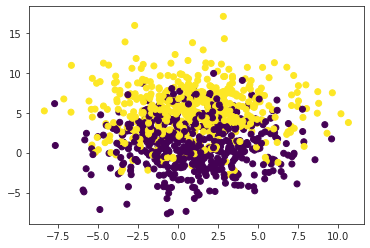

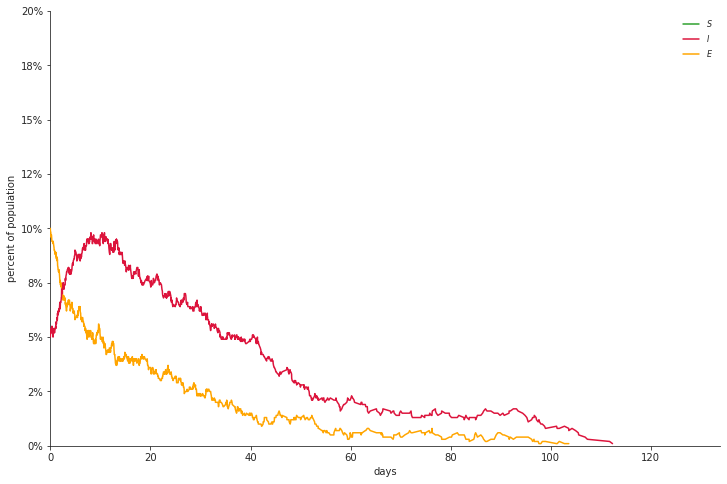

[1000, [[1, 1], [1, 5]], 3.5, 30]
t = 0.07
t = 10.02
t = 20.04
t = 30.01
t = 40.11
t = 50.24
t = 60.20
t = 70.75
t = 90.42
t = 140.43


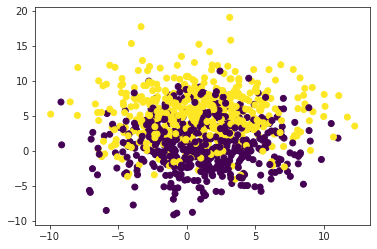

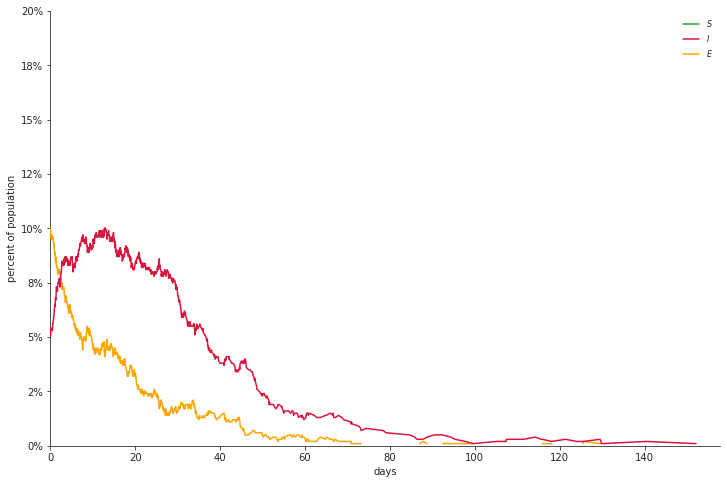

[1000, [[1, 1], [1, 5]], 4.0, 30]
t = 0.07
t = 10.09
t = 20.06
t = 30.15
t = 40.16
t = 50.04
t = 60.26
t = 70.04


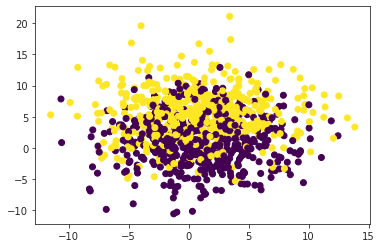

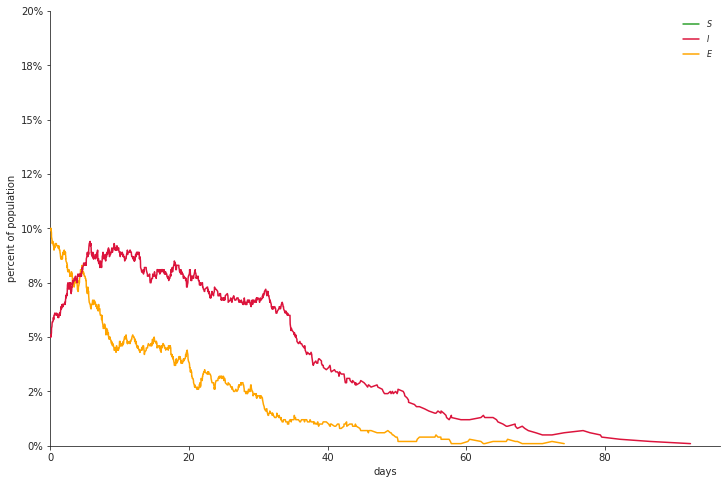

[1000, [[1, 1], [1, 5]], 1.5, 35]
t = 0.00
t = 10.10
t = 20.10
t = 30.11
t = 40.00
t = 50.22
t = 60.13
t = 70.10
t = 80.06
t = 90.09
t = 110.33


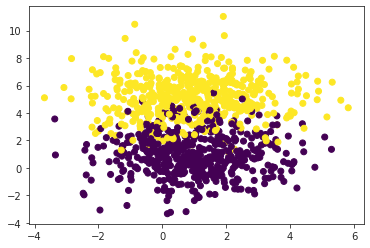

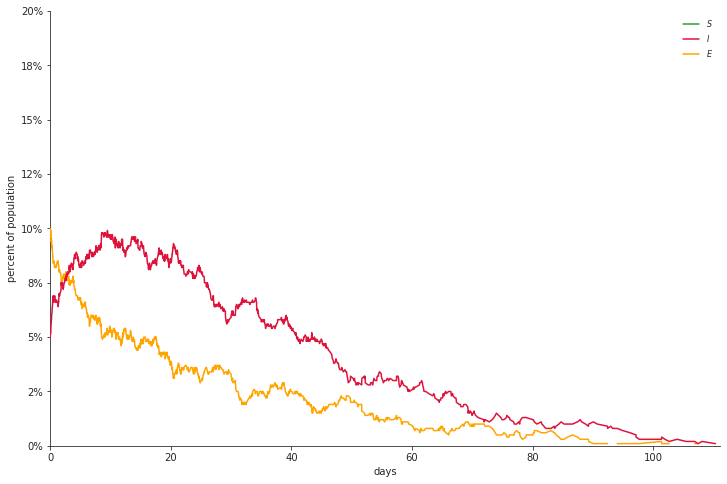

[1000, [[1, 1], [1, 5]], 2.0, 35]
t = 0.00
t = 10.03
t = 20.04
t = 30.03
t = 40.11
t = 50.12
t = 60.10
t = 70.77
t = 80.41
t = 100.32
t = 130.60


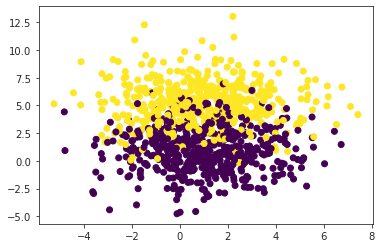

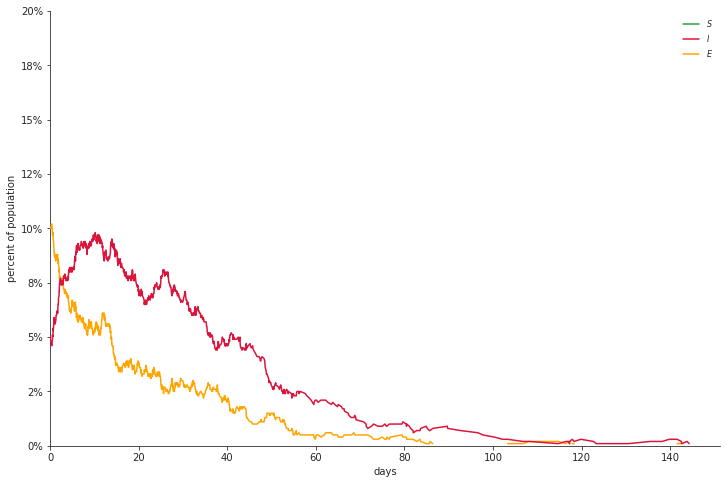

[1000, [[1, 1], [1, 5]], 2.5, 35]
t = 0.00
t = 10.08
t = 20.15
t = 30.04
t = 40.26
t = 50.05
t = 60.07
t = 70.98
t = 80.71


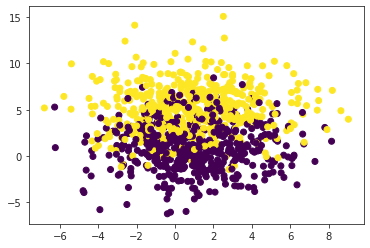

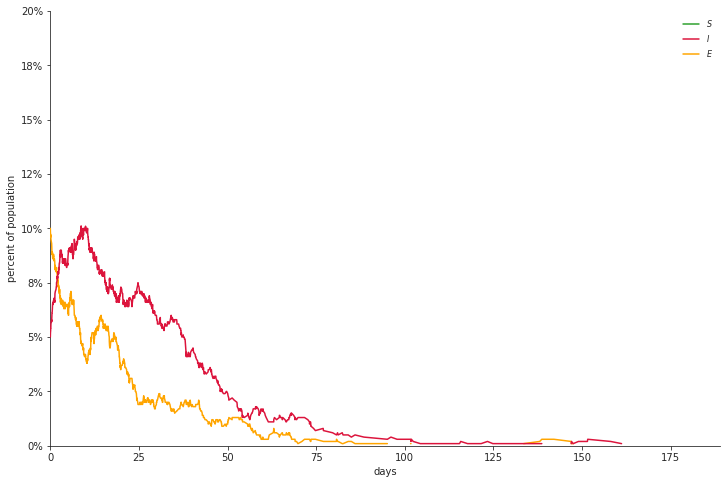

[1000, [[1, 1], [1, 5]], 3.0, 35]
t = 0.02
t = 10.00
t = 20.04
t = 30.09
t = 40.14
t = 50.33
t = 60.05
t = 70.00
t = 80.51
t = 90.35
t = 100.64


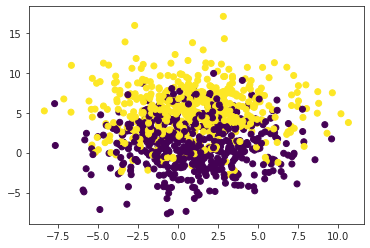

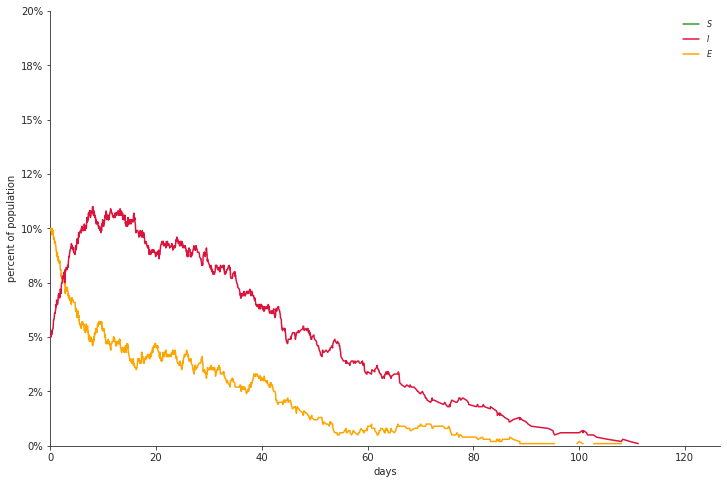

[1000, [[1, 1], [1, 5]], 3.5, 35]
t = 0.02
t = 10.03
t = 20.02
t = 30.00
t = 40.17
t = 50.01
t = 60.21
t = 70.63
t = 80.59


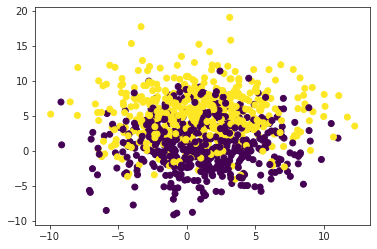

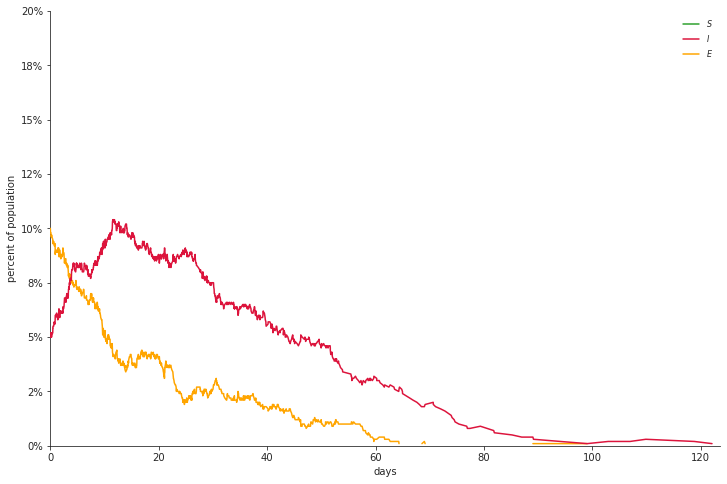

[1000, [[1, 1], [1, 5]], 4.0, 35]
t = 0.00
t = 10.02
t = 20.03
t = 30.03
t = 40.00
t = 50.02
t = 60.32
t = 70.36
t = 80.94


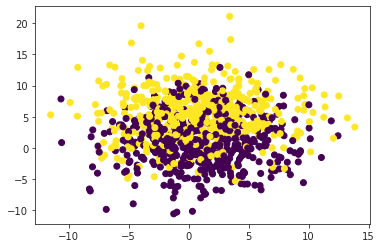

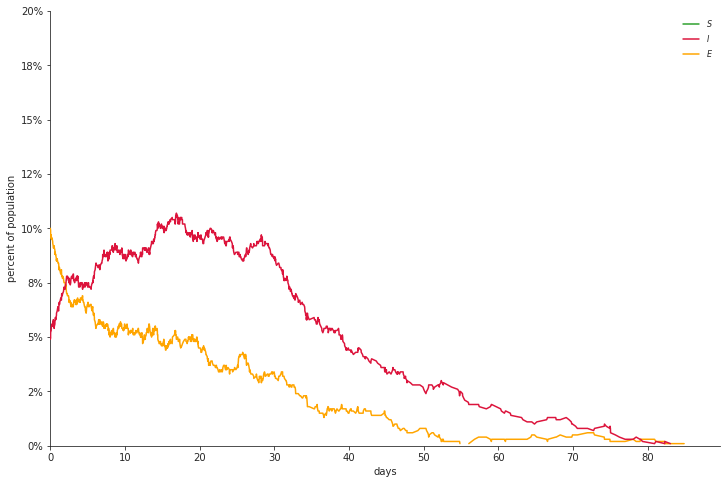

In [12]:
for l in range(7):
    for sdv in range(3, 9):
        ipfn(1000,[[1,1],[1,5]], sdv/2, 5*(l+1))

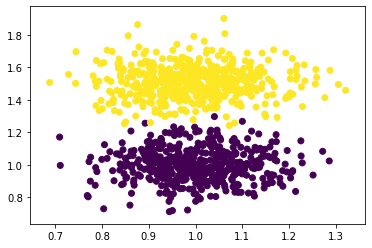

In [18]:
sd = 0.1
s= 1000
arr = [int(s/2), int(s/2)]
data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=[[1,1],[1,1+sd*5]] ,cluster_std=sd)
plt.scatter(data[:,0],data[:,1], c=y, cmap = 'viridis')

[1000, [[1, 1], [1, 7]], 0.5, 5]
t = 0.02
t = 10.02
t = 20.00
t = 30.01
t = 40.02
t = 50.18
t = 60.71
t = 70.01
t = 90.04
t = 100.02
t = 120.54


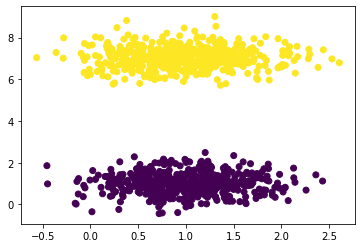

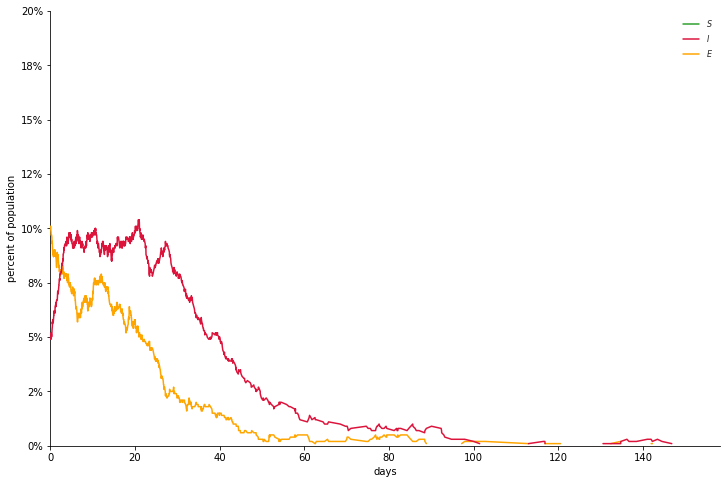

[1000, [[1, 1], [1, 13]], 1.0, 10]
t = 0.02
t = 10.02
t = 20.06
t = 30.04
t = 40.02
t = 50.22
t = 60.07
t = 70.85


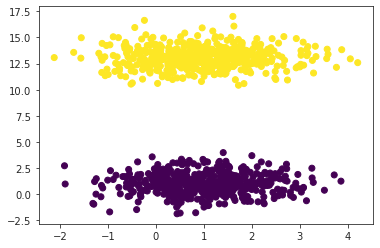

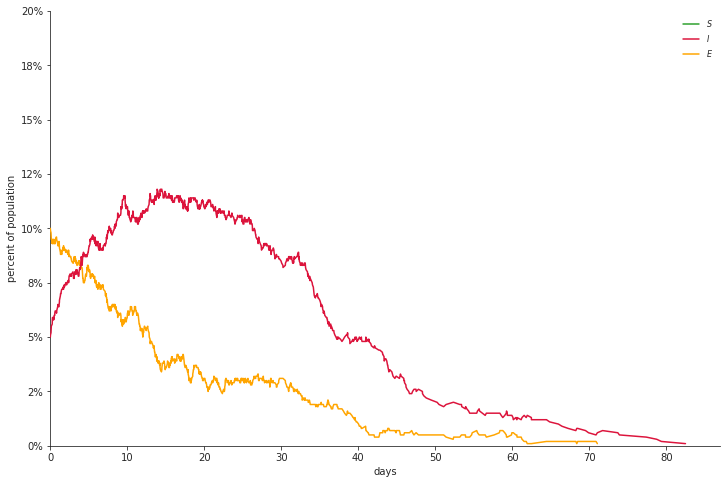

[1000, [[1, 1], [1, 19]], 1.5, 15]
t = 0.01
t = 10.08
t = 20.01
t = 30.07
t = 40.03
t = 50.06
t = 60.05
t = 70.03
t = 80.63
t = 90.22
t = 100.26
t = 120.47
t = 130.45
t = 140.80
t = 170.07


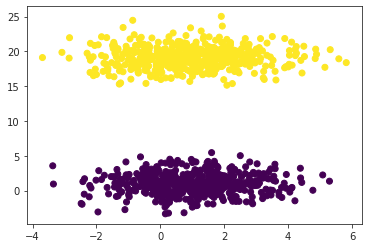

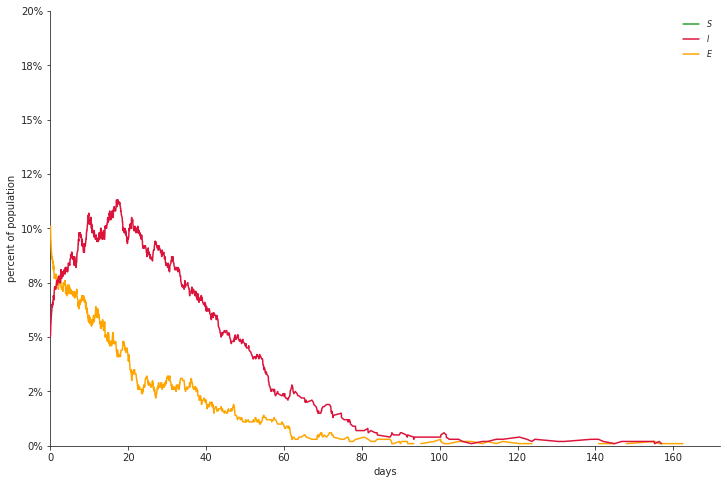

[1000, [[1, 1], [1, 25]], 2.0, 20]
t = 0.04
t = 10.00
t = 20.07
t = 30.00
t = 40.01
t = 50.13
t = 60.19
t = 70.67
t = 90.79
t = 100.19
t = 110.85
t = 120.64


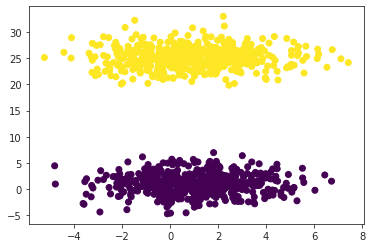

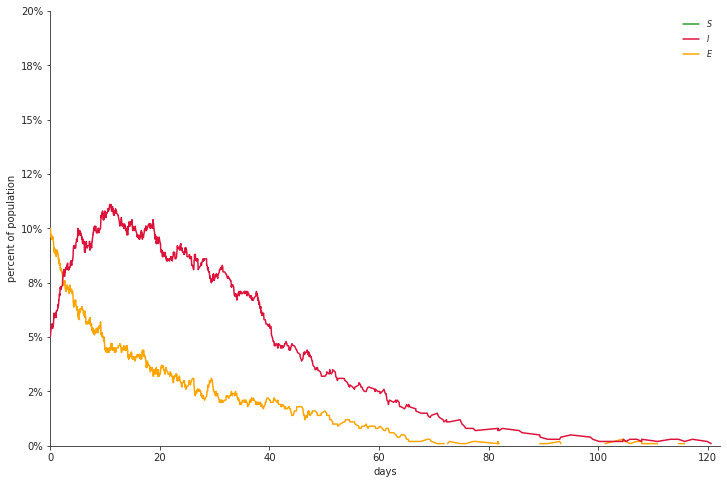

[1000, [[1, 1], [1, 31]], 2.5, 25]
t = 0.02
t = 10.05
t = 20.05
t = 30.09
t = 40.17
t = 50.03
t = 60.17
t = 70.18
t = 80.19
t = 90.91


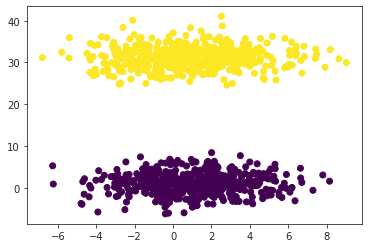

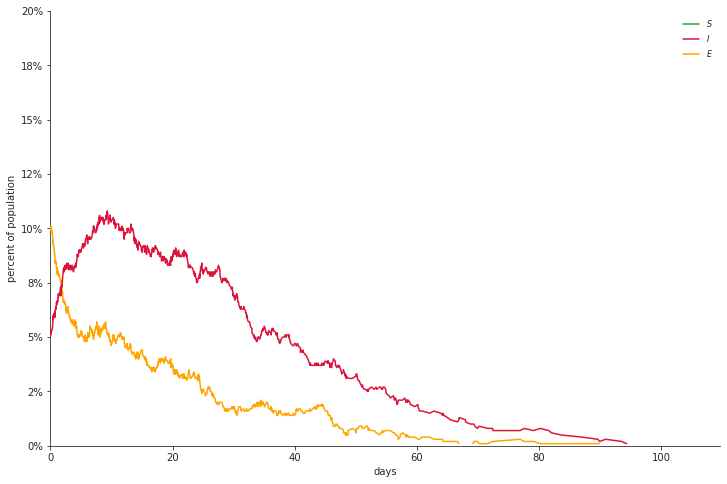

[1000, [[1, 1], [1, 37]], 3.0, 30]
t = 0.06
t = 10.00
t = 20.08
t = 30.07
t = 40.09
t = 50.02
t = 60.43
t = 70.43


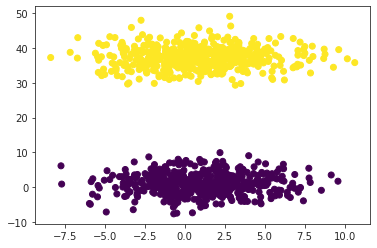

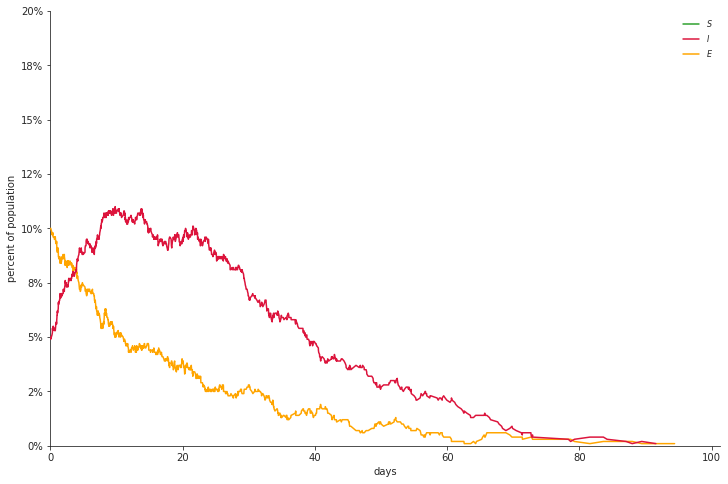

[1000, [[1, 1], [1, 7]], 0.5, 5]
t = 0.01
t = 10.03
t = 20.08
t = 30.06
t = 40.22
t = 50.07
t = 60.34
t = 70.03
t = 80.07
t = 90.39
t = 100.92


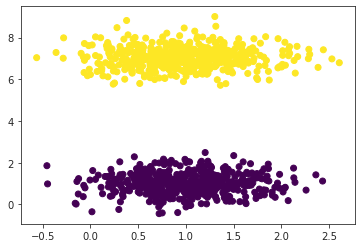

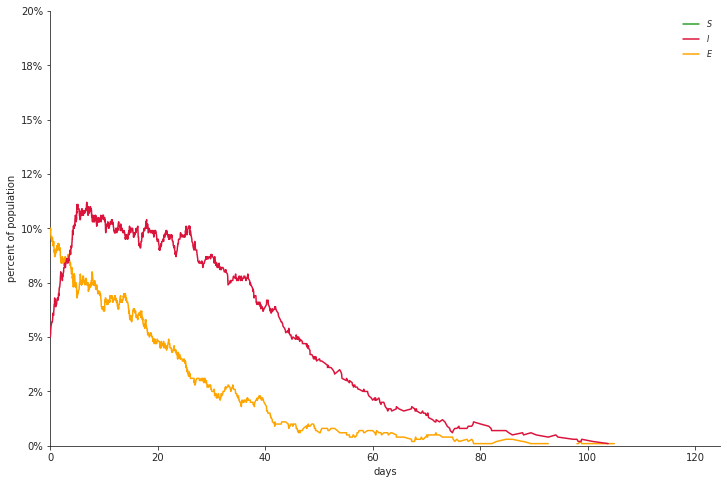

[1000, [[1, 1], [1, 13]], 1.0, 10]
t = 0.02
t = 10.06
t = 20.06
t = 30.06
t = 40.04
t = 50.35
t = 60.01
t = 70.09
t = 80.47
t = 91.00
t = 100.04
t = 120.52


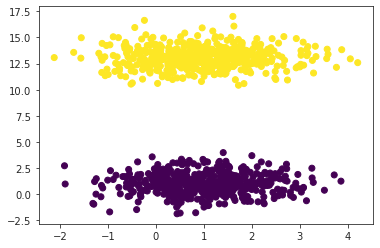

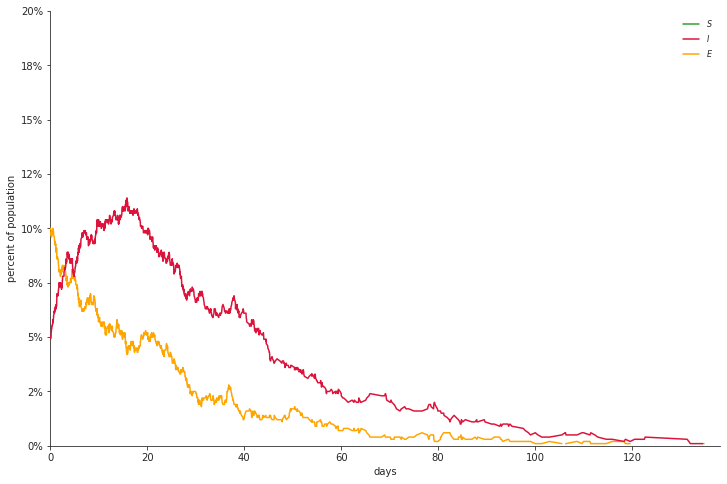

[1000, [[1, 1], [1, 19]], 1.5, 15]
t = 0.01
t = 10.00
t = 20.07
t = 30.07
t = 40.00
t = 50.22
t = 60.24
t = 80.42
t = 90.16
t = 100.06
t = 110.82


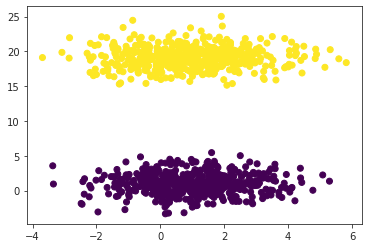

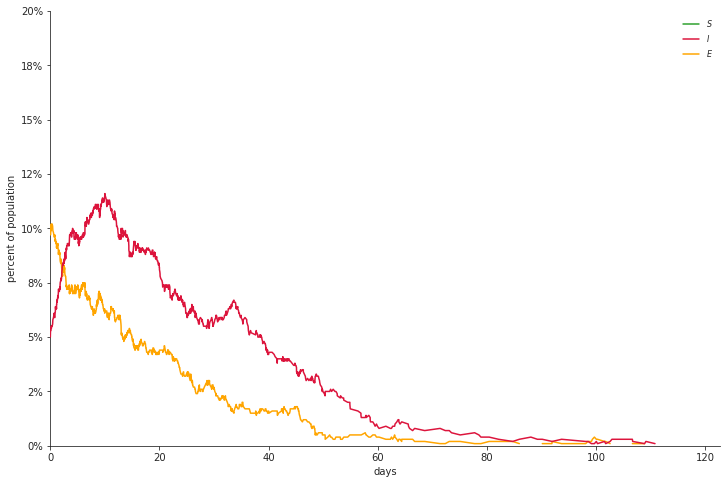

[1000, [[1, 1], [1, 25]], 2.0, 20]
t = 0.01
t = 10.01
t = 20.03
t = 30.03
t = 40.01
t = 50.24
t = 60.08
t = 70.15
t = 80.20


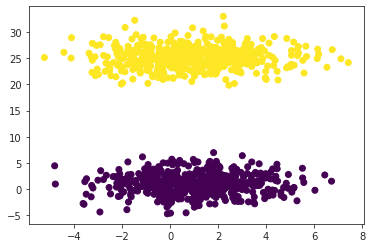

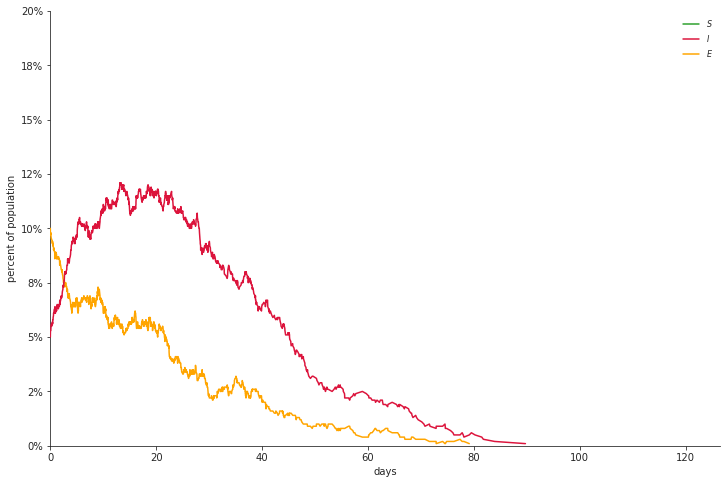

[1000, [[1, 1], [1, 31]], 2.5, 25]
t = 0.04
t = 10.01
t = 20.15
t = 30.01
t = 40.18
t = 50.43
t = 60.21
t = 70.49
t = 80.60
t = 120.13


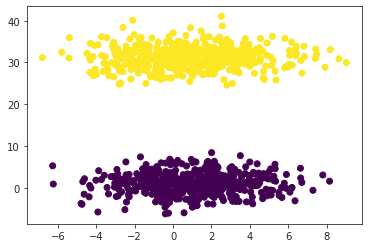

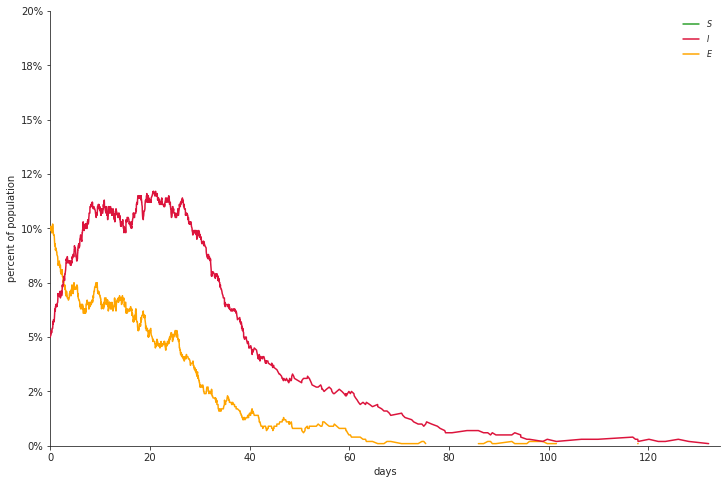

[1000, [[1, 1], [1, 37]], 3.0, 30]
t = 0.00
t = 10.05
t = 20.01
t = 30.02
t = 40.05
t = 50.03
t = 60.05
t = 70.22
t = 80.34
t = 100.40
t = 110.71


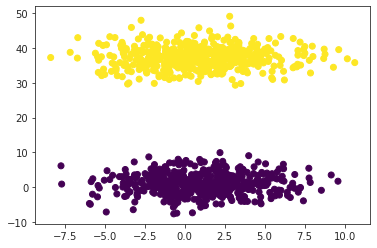

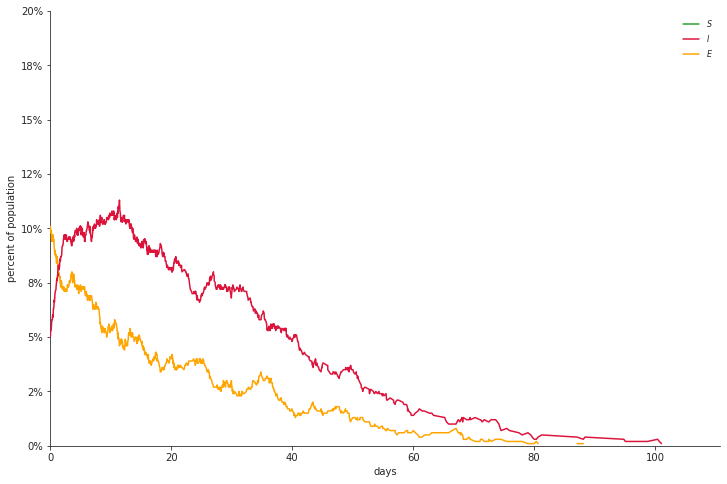

[1000, [[1, 1], [1, 7]], 0.5, 5]
t = 0.12
t = 10.00
t = 20.03
t = 30.00
t = 40.26
t = 50.24
t = 60.22
t = 80.27
t = 100.88
t = 110.74


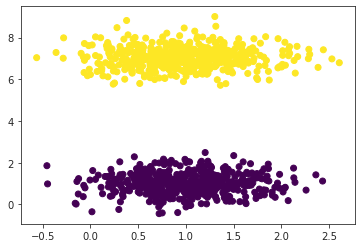

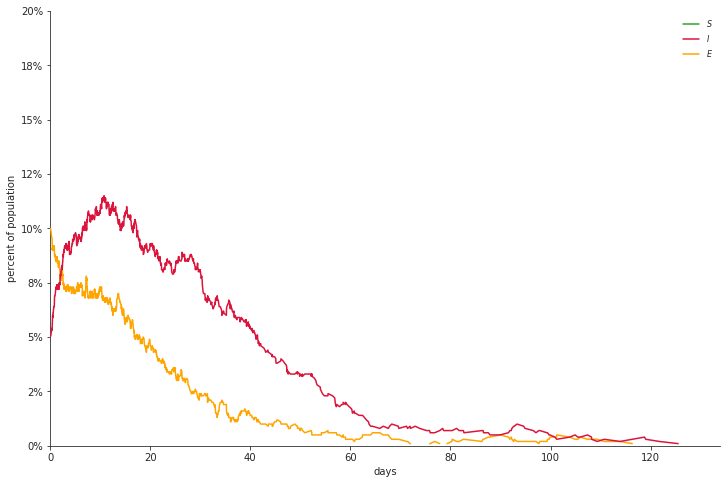

[1000, [[1, 1], [1, 13]], 1.0, 10]
t = 0.01
t = 10.04
t = 20.04
t = 30.06
t = 40.16
t = 50.15


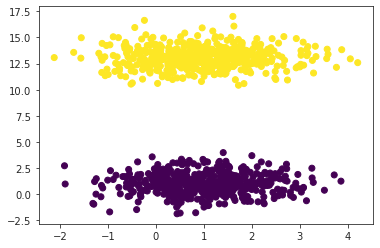

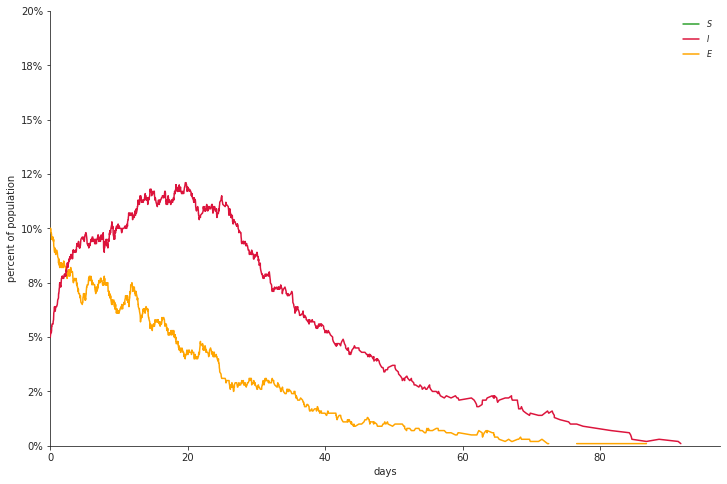

[1000, [[1, 1], [1, 19]], 1.5, 15]
t = 0.02
t = 10.05
t = 20.01
t = 30.06
t = 40.21
t = 50.01
t = 60.28
t = 70.57
t = 80.49
t = 90.19


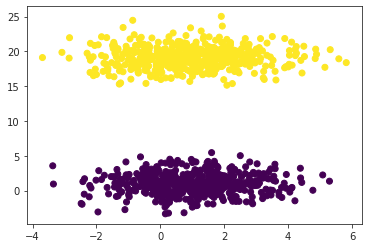

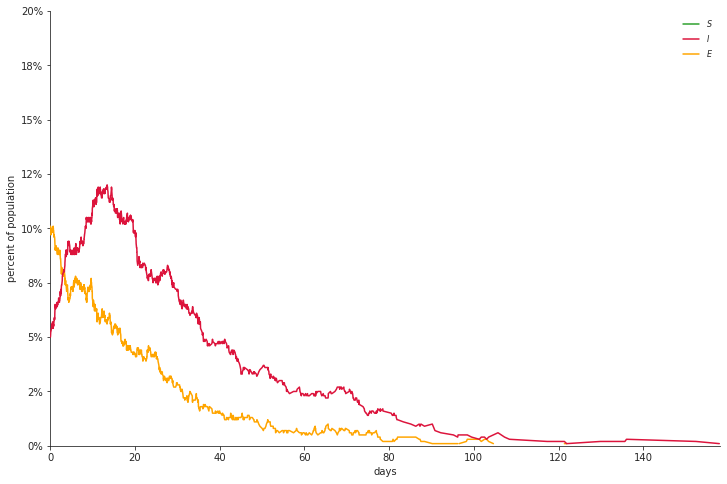

[1000, [[1, 1], [1, 25]], 2.0, 20]
t = 0.03
t = 10.02
t = 20.03
t = 30.19
t = 40.00
t = 50.12
t = 60.66
t = 70.66
t = 90.14


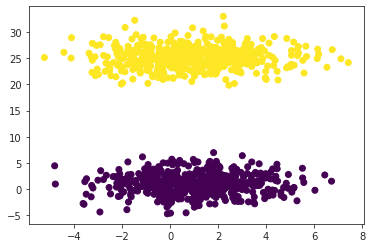

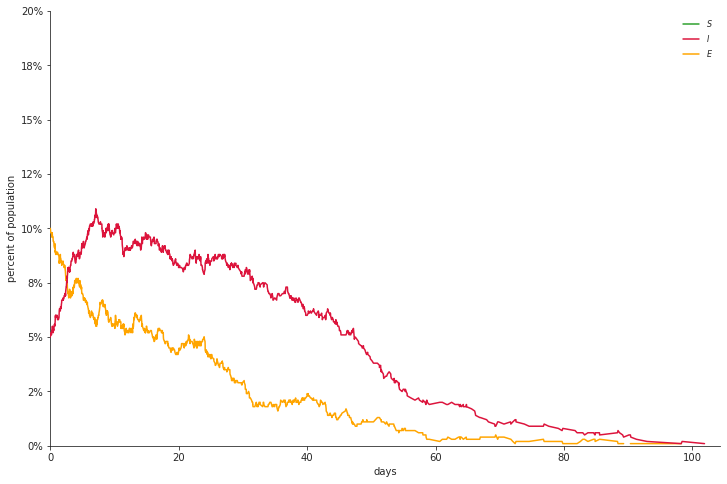

[1000, [[1, 1], [1, 31]], 2.5, 25]
t = 0.01
t = 10.01
t = 20.07
t = 30.02
t = 40.05
t = 50.04
t = 60.08
t = 70.82
t = 80.01
t = 100.77
t = 120.51


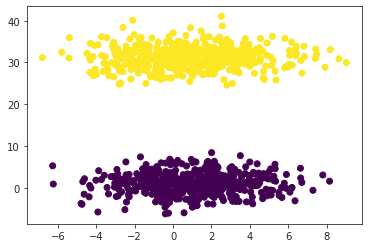

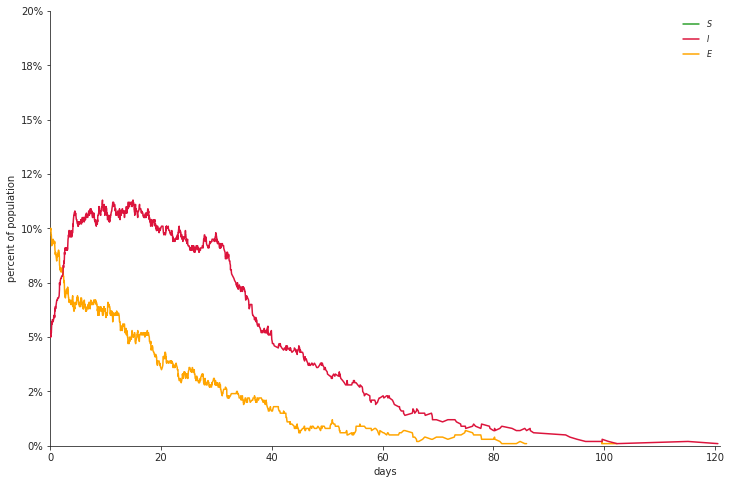

[1000, [[1, 1], [1, 37]], 3.0, 30]
t = 0.00
t = 10.03
t = 20.07
t = 30.10
t = 40.11
t = 50.02
t = 60.15
t = 70.17
t = 80.03
t = 100.54


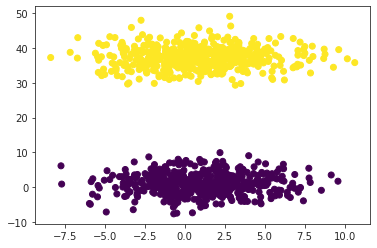

In [ ]:
for l in range(5):
    for sdv in range(1, 7):
        ipfn(1000,[[1,1],[1,(1+6*sdv)]], sdv/2, sdv*5)

[1000, [[1, 0], [1, 10]], 0.5, 10]
t = 0.04
t = 10.02
t = 20.02
t = 30.02
t = 40.28
t = 50.26
t = 60.01
t = 70.94
t = 80.84


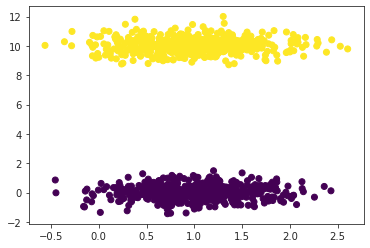

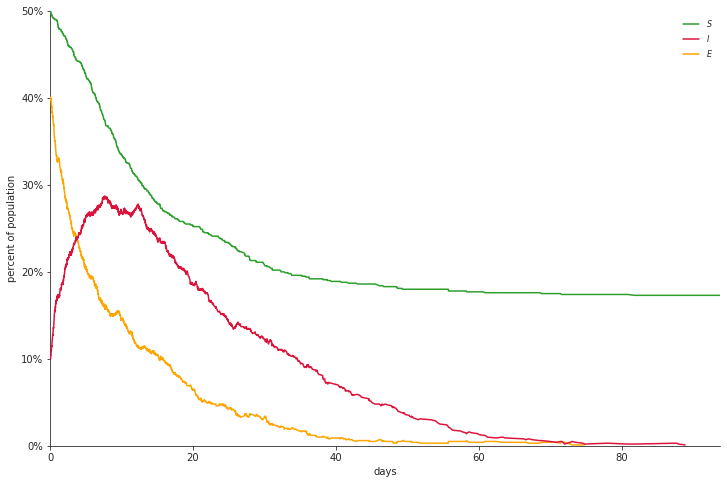

[1000, [[1, 0], [1, 10]], 1.0, 10]
t = 0.01
t = 10.04
t = 20.01
t = 30.04
t = 40.02
t = 50.04
t = 60.54
t = 70.10


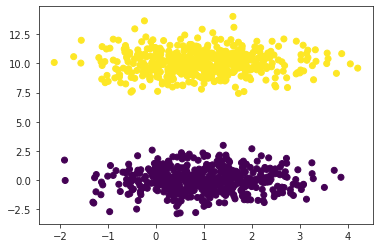

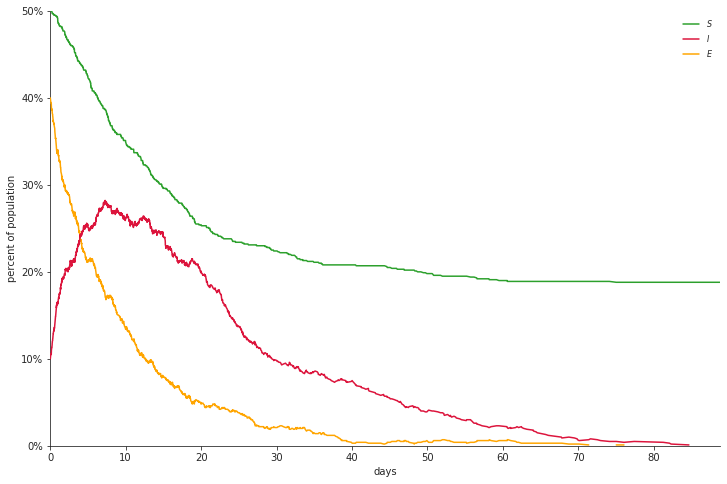

[1000, [[1, 0], [1, 10]], 1.5, 10]
t = 0.03
t = 10.00
t = 20.03
t = 30.04
t = 40.01
t = 50.14
t = 60.41
t = 70.20


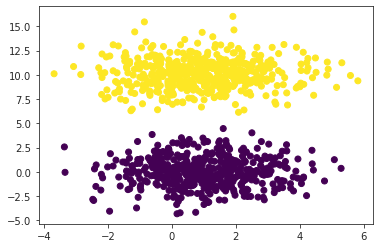

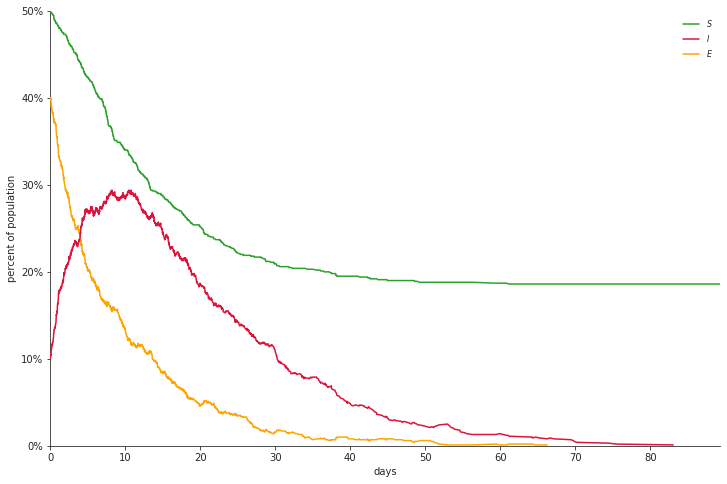

[1000, [[1, 0], [1, 10]], 2.0, 10]
t = 0.02
t = 10.01
t = 20.03
t = 30.10
t = 40.04
t = 50.01
t = 60.12
t = 70.18


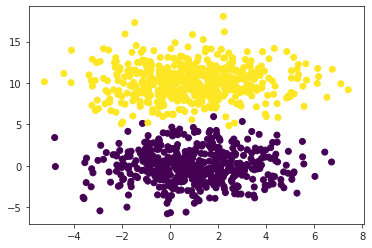

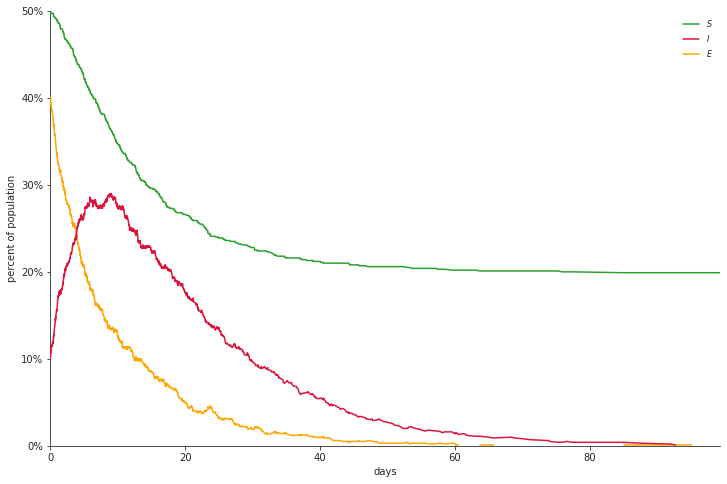

[1000, [[1, 0], [1, 10]], 2.5, 10]
t = 0.01
t = 10.02
t = 20.01
t = 30.07
t = 40.07
t = 50.01
t = 70.46
t = 80.82


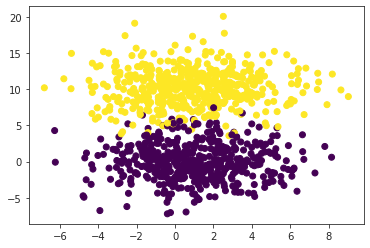

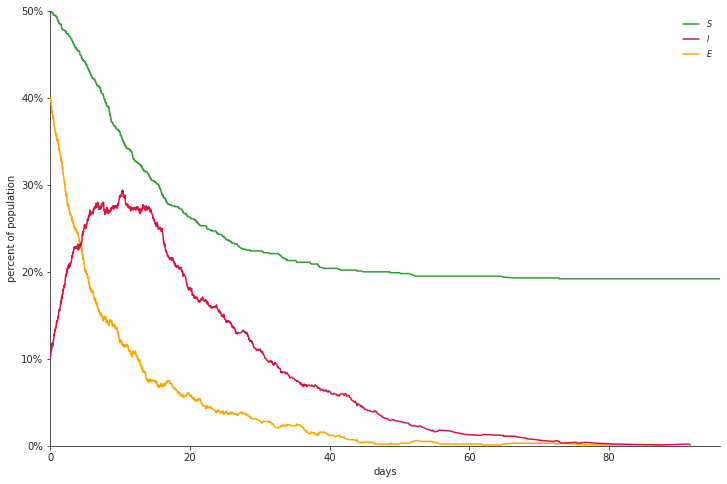

[1000, [[1, 0], [1, 10]], 3.0, 10]
t = 0.00
t = 10.00
t = 20.09
t = 30.03
t = 40.16
t = 50.86
t = 60.12


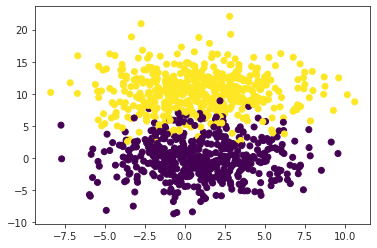

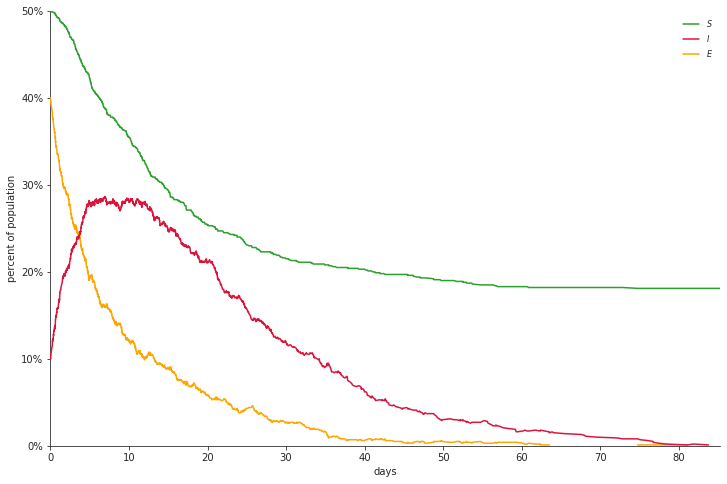

In [26]:
for i in range(1,7):
    ipfn(1000, [[1,0],[1,10]], i/2, 10)